In [ ]:
import numpy as np
import pandas as pd
pd.set_option("max_colwidth", 180)

import json
import glob

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.style.use("seaborn-talk")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_data(file_path, indx = True, indx_col = 0):
  '''Parameters:
  file_path: path to your excel or csv file with data,

  indx: boolean - whether there is index column in your file (usually it is the first column) --> *by default it is set to True
  
  indx_col: int - if your file has an index column, specify column number here --> *by default it is equal to 0 (first column)
  '''
  if indx == True and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path)

  elif indx == True and file_path.endswith(".csv"):
    data = pd.read_csv(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".csv"):
    data = pd.read_csv(file_path)
  return data


#Imports

In [ ]:
from pprint import pprint


f = open("/content/drive/MyDrive/Colab Notebooks/debates/24448.json")
map0 = json.load(f)
f.close()
pprint(map0)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
                   'x': 600,
                   'y': 1615},
            'visible': True},
           {'from': {'color': 'b',
                     'cqdesc': {},
                     'descriptors': {},
                     'h': 30,
                     'id': 120,
                     'imgurl': '',
                     'participantID': '0',
                     'scheme': '0',
                     'text': 'TRUMP : We lose to everybody',
                     'type': 'L',
                     'visible': True,
                     'w': 180,
                     'x': 1002,
                     'y': 1604},
            'to': {'color': 'y',
                   'cqdesc': {},
                   'descriptors': {'s_AssertContent': '-',
                                   's_AssertLocution': '-'},
                   'h': 30,
                   'id': 121,
                   'imgurl': '',
                   'participantID': '0',
            

In [ ]:
#june = load_data('/content/drive/MyDrive/Colab Notebooks/debates/june64_maps.xlsx')
june.columns=['map']
june['map'] = june['map'].str.replace('nodeset', '').apply(int)
june.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   map     64 non-null     int64
dtypes: int64(1)
memory usage: 1.0 KB


In [ ]:
june64 = june['map'].to_list()
len(june64)

64

In [ ]:
june66 = [20109,20075,20076,20077,20110,20079,20111,20112,20113,20080,20114,19846,20021,20022,20023,20024,20025,20026,20027,20028,20029,20030,20119,20116,20117,20118,20119,20120,20121,20122,20123,20125,20126,20231,19822,19823,19947,19948,20063,20086,20146,20147,20148,20153,19924,19922,19923,19924,19925,20092,19933,19935,19937,19940,19944,20073,19931,19943,20000,20003,20082,20070,20081,20084,20085,20163]
len(set(june66))

64

In [ ]:
j_d = {}


In [ ]:
for m in june66:

  j_d[m] += 1


In [ ]:
df66 = pd.DataFrame(june66)
df66[df66.duplicated()]

,0
26,20119
47,19924


In [ ]:
len(set(june66).intersection(set(june64)))

64

# Retrieve data from json

In [ ]:
maps = glob.glob("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/Julia/*.json")

In [ ]:
maps_n = [map[-10:-5] for map in maps]
maps_n

In [ ]:
len(maps_n), len(set(maps_n)) 

(65, 65)

In [ ]:
maps[0][-10:-5]

'25315'

In [ ]:
maps[0]

'/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/Julia Augustyniak/25315.json'

In [ ]:
# specific for pathotic schemes

def conclusionPremiseDict(premises, conclusions):
    pairs = {}
    for i, x in enumerate(conclusions):
        pairs[i] = {'conclusion':x, 'premises':[]}
        id_to = x['from']['id']
        for p in premises:
            if p['to']['id'] == id_to:
                pairs[i]['premises'].append(p)                
    return pairs

def aduPairs(edgePairs, nodesById):
    aduPair = []
    for pair in edgePairs.values():
        for p in pair['premises']:
          aduPair.append([nodesById[pair['conclusion']['to']['id']]['text'], nodesById[p['from']['id']]['text']])    
    return aduPair

def pairs(map):
    with open(map) as f:
        data = json.loads(f.read())
    nodesById = {}
    for _, node in enumerate(data['nodes']):
        nodesById[node['id']] = node
        
    premises = [x for x in data['edges'] if nodesById[x['from']['id']]['type'] == 'I' and nodesById[x['to']['id']]['type'] == 'RA']

    conclusions = [x for x in data['edges'] if nodesById[x['from']['id']]['type'] == 'RA' and nodesById[x['to']['id']]['type'] == 'I']
    edgePairs = conclusionPremiseDict(premises, conclusions)
    adus = aduPairs(edgePairs, nodesById)
    return adus, conclusions, premises, nodesById    

truePairs = []
conclusions = []
premises = []
nodesById = {}

map_number = []

for i, m in enumerate(maps):
    adus, c, p, n = pairs(m)
    truePairs.extend(adus)
    conclusions.extend(c)
    premises.extend(p)
    nodesById = {**nodesById, **n}
    for num in range(len(adus)):
      map_number.append(maps[i][-10:-5])          ########   check if only number stays in json path !!!!!

In [ ]:
len(truePairs)

719

In [ ]:
len(map_number)

719

In [ ]:
df = pd.DataFrame(truePairs)
df.columns = ["conclusion", "premise"]
df["map_ID"] = map_number
print(df.shape)
df

(719, 3)


,conclusion,premise,map_ID
0,W programie koalicji obywatelskiej zapisaliśmy wyraźnie kwestię związków partnerskich,Dla nas równość wobec prawa oznacza że państwo nie narzuca tego kogo mamy kochać jak mamy żyć z kim mamy zawierać nasze związki.,25059
1,W programie koalicji obywatelskiej zapisaliśmy wyraźnie kwestię związków partnerskich,Godność człowieka jest dla nas fundamentalną wartością.,25059
2,Zapewnimy że będzie możliwość dziedziczenia będzie możliwość wspólnego rozliczania się i przede wszystkim będzie możliwość dowiedzenia się o stanie zdrowia osoby bliskiej,dlatego że wszyscy jesteśmy równi wobec prawa i godność człowieka powinna być ponad podziałami politycznymi.,25059
3,W programie koalicji obywatelskiej zapisaliśmy wyraźnie kwestię związków partnerskich,wyraźnie również mówimy o tym że nie ma mowy w naszym programie na temat adopcji,25059
4,Zapewnimy że będzie możliwość dziedziczenia będzie możliwość wspólnego rozliczania się i przede wszystkim będzie możliwość dowiedzenia się o stanie zdrowia osoby bliskiej,ale chcę wyraźnie powiedzieć że ceniąc indywidualność i godność każdego człowieka.,25059
...,...,...,...
714,będziemy chronić polskie dzieci,Dzieci muszą być chronione.,25089
715,My jesteśmy tolerancyjni,"Tolerancja nie oznacza afirmacji, nigdy nie zgodzimy się na wprowadzenie planu Rabieja tego planu który oznacza najpierw wprowadzenie związków partnerskich potem małżeństw homo...",25089
716,"będziemy chronić polskie rodziny w tym wymiarze który jest zapisany w konstytucji, Prawo i Sprawiedliwość to gwarantuje.",w Polsce trwa ofensywa środowisk LGBT które chcą narzucić Polakom nie akceptowane przez nas wszystkich rewolucje ideologiczną chcą przebudować model rodziny w Polsce.,25089
717,"Konfederacja nie zajmuje się snuciem wizji, tylko mówieniem prawdę, a prawda jest taka że polska energetyka jest tak rozstrojona, że przez najbliższe kilkadziesiąt lat znaczn...",80 proc. naszej energii w tej chwili pochodzi z węgla.,25354


In [ ]:
df.shape

(719, 3)

In [ ]:
df[df.duplicated(['conclusion', 'premise', 'map_ID'])].shape

(0, 3)

In [ ]:
df["scheme_name"] = ''
df["scheme_aifdb_ID"] = ''

for i, p in enumerate(premises):
  for i2, p2 in enumerate(conclusions):
    for arg_id in df.index:
      if premises[i]['to']['id'] == conclusions[i2]['from']['id'] and premises[i]['from']['text'] == df.loc[arg_id, "premise"] and conclusions[i2]['to']['text']  == df.loc[arg_id, "conclusion"]:
        df.loc[arg_id, "scheme_name"] = premises[i]['to']['text']
        df.loc[arg_id, "scheme_aifdb_ID"] = premises[i]['to']['scheme']

In [ ]:
df["annotator_id"] = 1
df.iloc[:10]

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id
0,W programie koalicji obywatelskiej zapisaliśmy wyraźnie kwestię związków partnerskich,Dla nas równość wobec prawa oznacza że państwo nie narzuca tego kogo mamy kochać jak mamy żyć z kim mamy zawierać nasze związki.,25059,Positive Consequences,27,1
1,W programie koalicji obywatelskiej zapisaliśmy wyraźnie kwestię związków partnerskich,Godność człowieka jest dla nas fundamentalną wartością.,25059,Positive Consequences,27,1
2,Zapewnimy że będzie możliwość dziedziczenia będzie możliwość wspólnego rozliczania się i przede wszystkim będzie możliwość dowiedzenia się o stanie zdrowia osoby bliskiej,dlatego że wszyscy jesteśmy równi wobec prawa i godność człowieka powinna być ponad podziałami politycznymi.,25059,Positive Consequences,27,1
3,W programie koalicji obywatelskiej zapisaliśmy wyraźnie kwestię związków partnerskich,wyraźnie również mówimy o tym że nie ma mowy w naszym programie na temat adopcji,25059,Default Inference,72,1
4,Zapewnimy że będzie możliwość dziedziczenia będzie możliwość wspólnego rozliczania się i przede wszystkim będzie możliwość dowiedzenia się o stanie zdrowia osoby bliskiej,ale chcę wyraźnie powiedzieć że ceniąc indywidualność i godność każdego człowieka.,25059,Positive Consequences,27,1
5,Głos na PSL to najprostsza droga do odsunięcia złych ludzi od władzy.\n,"Ani lewica - czy to z Platformy czy z SLD - anie prawica z Konfederacji czy z PiSu, nie zapewni normalności.",25061,Fear Appeal,17,1
6,Głos na PSL to najprostsza droga do odsunięcia złych ludzi od władzy.\n,"Głos oddany na PSL będzie najcenniejszy, bo to jest głos za państwem, które szanuje każdego człowieka, które nikomu nie zagląda za firanki, ale nie pozwoli na rewolucję obyczaj...",25061,Default Inference,72,1
7,Głos na PSL to najprostsza droga do odsunięcia złych ludzi od władzy.\n,"To jest państwo, które będzie działać w myśl staropolskiego przysłowia “bez pracy nie ma kołaczy”, docenimy ludzi ciężkiej pracy, nie tylko polityka społeczna, ale docenienie t...",25061,Default Inference,72,1
8,"To jest państwo, które będzie działać w myśl staropolskiego przysłowia “bez pracy nie ma kołaczy”, docenimy ludzi ciężkiej pracy, nie tylko polityka społeczna, ale docenienie t...","I dla Polski w imię zasad, trzeba pójść na te wybory.",25061,Positive Consequences,27,1
9,Proszę was moi rodacy nie traćcie wiary w lepszą przyszłość Polski.,"Ona jest w naszym zasięgu. Ona jest możliwa, tylko trzeba wybrać rozsądne centrum.",25061,Positive Consequences,27,1


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conclusion       719 non-null    object
 1   premise          719 non-null    object
 2   map_ID           719 non-null    object
 3   scheme_name      719 non-null    object
 4   scheme_aifdb_ID  719 non-null    object
 5   annotator_id     719 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 33.8+ KB


In [ ]:
premises[2]['from']

{'color': 'b',
 'cqdesc': {},
 'descriptors': {},
 'h': 110,
 'id': 8,
 'imgurl': '',
 'participantID': '0',
 'scheme': '0',
 'text': "WALKER recently signed an abortion law in Wisconsin that does have an exception for the mother 's life , but WALKER is on the record as having objected to it ",
 'type': 'I',
 'visible': True,
 'w': 200,
 'x': 442,
 'y': 276}

# Recoding scheme IDs

In [ ]:
# Argument Schemes --> 8 instances

0  Default Inference
1  Argument from Positive Consequences (APC), 
2  Argument from Negative Consequences (ANC),
3  Argument from Fear Appeal (AFA),
4  Argument from Danger Appeal (ADA),
5  Argument from Threat (AT),
6  Slippery Slope Argument (SSA),
7  Argument from Waste (AW),
8  Argument from Need for Help (ANH)

0 others

In [ ]:
df.scheme_name.unique() 

array(['Positive Consequences', 'Default Inference', 'Fear Appeal',
       'Negative Consequences', 'Waste', 'Need For Help', 'Example',
       'Danger Appeal'], dtype=object)

In [ ]:
df.map_ID.nunique()

65

In [ ]:
recode_scheme_labels = {'Default Inference':0, 
                        'Positive Consequences':1, 'Negative Consequences':2, 
                        'Fear Appeal':3, 'Danger Appeal':4, 'Threat':5, 
                        'Causal Slippery Slope':6, 'Waste':7, 'Need For Help': 8, 
                        'Example':0, 'Popular Opinion':0, 'Expert Opinion':0}

df["scheme_label"] = df.scheme_name.map(recode_scheme_labels).apply(int)
df

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label
0,W programie koalicji obywatelskiej zapisaliśmy wyraźnie kwestię związków partnerskich,Dla nas równość wobec prawa oznacza że państwo nie narzuca tego kogo mamy kochać jak mamy żyć z kim mamy zawierać nasze związki.,25059,Positive Consequences,27,1,1
1,W programie koalicji obywatelskiej zapisaliśmy wyraźnie kwestię związków partnerskich,Godność człowieka jest dla nas fundamentalną wartością.,25059,Positive Consequences,27,1,1
2,Zapewnimy że będzie możliwość dziedziczenia będzie możliwość wspólnego rozliczania się i przede wszystkim będzie możliwość dowiedzenia się o stanie zdrowia osoby bliskiej,dlatego że wszyscy jesteśmy równi wobec prawa i godność człowieka powinna być ponad podziałami politycznymi.,25059,Positive Consequences,27,1,1
3,W programie koalicji obywatelskiej zapisaliśmy wyraźnie kwestię związków partnerskich,wyraźnie również mówimy o tym że nie ma mowy w naszym programie na temat adopcji,25059,Default Inference,72,1,0
4,Zapewnimy że będzie możliwość dziedziczenia będzie możliwość wspólnego rozliczania się i przede wszystkim będzie możliwość dowiedzenia się o stanie zdrowia osoby bliskiej,ale chcę wyraźnie powiedzieć że ceniąc indywidualność i godność każdego człowieka.,25059,Positive Consequences,27,1,1
...,...,...,...,...,...,...,...
714,będziemy chronić polskie dzieci,Dzieci muszą być chronione.,25089,Positive Consequences,27,1,1
715,My jesteśmy tolerancyjni,"Tolerancja nie oznacza afirmacji, nigdy nie zgodzimy się na wprowadzenie planu Rabieja tego planu który oznacza najpierw wprowadzenie związków partnerskich potem małżeństw homo...",25089,Default Inference,72,1,0
716,"będziemy chronić polskie rodziny w tym wymiarze który jest zapisany w konstytucji, Prawo i Sprawiedliwość to gwarantuje.",w Polsce trwa ofensywa środowisk LGBT które chcą narzucić Polakom nie akceptowane przez nas wszystkich rewolucje ideologiczną chcą przebudować model rodziny w Polsce.,25089,Fear Appeal,17,1,3
717,"Konfederacja nie zajmuje się snuciem wizji, tylko mówieniem prawdę, a prawda jest taka że polska energetyka jest tak rozstrojona, że przez najbliższe kilkadziesiąt lat znaczn...",80 proc. naszej energii w tej chwili pochodzi z węgla.,25354,Negative Consequences,22,1,2


In [ ]:
df.to_excel('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_JA2.xlsx')

In [ ]:
map_ids = load_data('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/sampled_maps_2.xlsx')
map_ids.shape

(192, 6)

In [ ]:
map_ids.head(3)

,annotator,annotator id,map number,link to aifdb,number of a new map,Unnamed: 6
0,Kalina Piskorska,0,17004,http://www.aifdb.org/argview/25039,25039,NaN
1,Kalina Piskorska,0,16968,http://www.aifdb.org/argview/25019,25019,NaN
2,Kalina Piskorska,0,17365,http://www.aifdb.org/argview/25020,25020,NaN


In [ ]:
df_ja_merged[df_ja_merged.map.isna()]

,annotator,annotator id,map number,link to aifdb,number of a new map,Unnamed: 6,map
14,Julia Augustyniak,1,17420,http://www.aifdb.org/argview/25089,25089,NaN,NaN
22,Julia Augustyniak,1,10811,http://www.aifdb.org/argview/25284,25284,NaN,NaN
46,Julia Augustyniak,1,17473,http://www.aifdb.org/argview/25354,25354,NaN,NaN


In [ ]:
#pz = df.copy()
#kp = df.copy()
ja = df.copy()

In [ ]:
df_all = pd.concat([kp, pz, ja], axis = 0)
print(df_all.shape)
df_all.reset_index(inplace=True, drop=True)
df_all.head()

(2123, 7)


,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label
0,Ale co jeszcze. Proszę państwa należy dać możliwość rozwijania się polskim rolnikom.,"Tymczasem ten rząd wprowadził ustawę, która ograniczyła możliwość rozwoju dla polskich rolników. Ustawę która ograniczyła handel ziemią.",25023,Negative Consequences,22,0,2
1,My damy oddech polskim rolnikom.,"Wyrównamy dopłaty, wywalczymy 15 miliardów więcej w nowym budżecie Unii Europejskiej.",25023,Positive Consequences,27,0,1
2,"Szanowni Państwo, w polityce liczy się wiarygodność.",Mamy rok 2019 i Jarosław Kaczyński obiecuje to po raz kolejny.,25023,Default Inference,72,0,0
3,Głos na PSL to najprostsza droga do odsunięcia złych ludzi od władzy.\n,"Ani lewica - czy to z Platformy czy z SLD - anie prawica z Konfederacji czy z PiSu, nie zapewni normalności.",25021,Fear Appeal,17,0,3
4,Głos na PSL to najprostsza droga do odsunięcia złych ludzi od władzy.\n,"Głos oddany na PSL będzie najcenniejszy, bo to jest głos za państwem, które szanuje każdego człowieka, które nikomu nie zagląda za firanki, ale nie pozwoli na rewolucję obyczaj...",25021,Positive Consequences,27,0,1


#Add columns with original map id


In [ ]:
# add columns with original map id

ja = load_data("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_JA2.xlsx")
kp = load_data("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_KP2.xlsx")
pz = load_data("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_PZ2.xlsx")

kp.shape

(689, 7)

In [ ]:
kp.head(1)

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label
0,Ale co jeszcze. Proszę państwa należy dać możliwość rozwijania się polskim rolnikom.,"Tymczasem ten rząd wprowadził ustawę, która ograniczyła możliwość rozwoju dla polskich rolników. Ustawę która ograniczyła handel ziemią.",25023,Negative Consequences,22,0,2


In [ ]:
all_df = pd.concat([ja, kp, pz], axis = 0)
all_df.shape

(1408, 7)

In [ ]:
all_df[all_df.duplicated(['conclusion', 'premise', 'map_ID', 'scheme_name', 'annotator_id'])]

In [ ]:
all_df.reset_index(inplace=True, drop=True)

In [ ]:
all_df.head(1)

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label
0,W programie koalicji obywatelskiej zapisaliśmy wyraźnie kwestię związków partnerskich,Dla nas równość wobec prawa oznacza że państwo nie narzuca tego kogo mamy kochać jak mamy żyć z kim mamy zawierać nasze związki.,25059,Positive Consequences,27,1,1


In [ ]:
all_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conclusion       2123 non-null   object
 1   premise          2123 non-null   object
 2   map_ID           2123 non-null   int64 
 3   scheme_name      2123 non-null   object
 4   scheme_aifdb_ID  2123 non-null   int64 
 5   annotator_id     2123 non-null   int64 
 6   scheme_label     2123 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 116.2+ KB


In [ ]:
all_df.fillna(0, inplace=True)

In [ ]:
numery_map = load_data('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/sampled_maps_2.xlsx')

numery_map = numery_map.iloc[:, :-1]
print(numery_map.shape)
numery_map['number of a new map'] = numery_map['number of a new map'].apply(int)
numery_map['map number'] = numery_map['map number'].apply(int)
numery_map.head(1)

(192, 5)


,annotator,annotator id,map number,link to aifdb,number of a new map
0,Kalina Piskorska,0,17004,http://www.aifdb.org/argview/25039,25039


In [ ]:
numery_map.columns = ['annotator', 'annotator_id', 'original_map_ID', 'link to aifdb','map_ID']

In [ ]:
numery_map['annotator_id'] = numery_map['annotator_id'].apply(int)

all_df['map_ID'] = all_df['map_ID'].apply(int)
all_df['annotator_id'] = all_df['annotator_id'].apply(int)

numery_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   annotator        192 non-null    object
 1   annotator_id     192 non-null    int64 
 2   original_map_ID  192 non-null    int64 
 3   link to aifdb    192 non-null    object
 4   map_ID           192 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 9.0+ KB


In [ ]:
numery_map.head(2)

,annotator,annotator_id,original_map_ID,link to aifdb,map_ID
0,Kalina Piskorska,0,17004,http://www.aifdb.org/argview/25039,25039
1,Kalina Piskorska,0,16968,http://www.aifdb.org/argview/25019,25019


In [ ]:
all_df.head(2)

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label
0,W programie koalicji obywatelskiej zapisaliśmy wyraźnie kwestię związków partnerskich,Dla nas równość wobec prawa oznacza że państwo nie narzuca tego kogo mamy kochać jak mamy żyć z kim mamy zawierać nasze związki.,25059,Positive Consequences,27,1,1
1,W programie koalicji obywatelskiej zapisaliśmy wyraźnie kwestię związków partnerskich,Godność człowieka jest dla nas fundamentalną wartością.,25059,Positive Consequences,27,1,1


In [ ]:
merged_annotation = all_df.merge(numery_map, on = ["annotator_id", "map_ID"], how = "left")
merged_annotation.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408 entries, 0 to 1407
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   conclusion       1408 non-null   object 
 1   premise          1408 non-null   object 
 2   map_ID           1408 non-null   int64  
 3   scheme_name      1408 non-null   object 
 4   scheme_aifdb_ID  1408 non-null   int64  
 5   annotator_id     1408 non-null   int64  
 6   scheme_label     1408 non-null   int64  
 7   annotator        1398 non-null   object 
 8   original_map_ID  1398 non-null   float64
 9   link to aifdb    1398 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 121.0+ KB


In [ ]:
merged_annotation[ (merged_annotation['original_map_ID'].isna())]

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,annotator,original_map_ID,link to aifdb
559,most Americans understand that USA today face a series of unprecedented crises,the middle class of the USA for the last 40 years has been disappearing,35284,Negative Consequences,22,1,2,NaN,NaN,NaN
560,most Americans understand that USA today face a series of unprecedented crises,millions of Americans are working longer hours for lower wages,35284,Negative Consequences,22,1,2,NaN,NaN,NaN
561,most Americans understand that USA today face a series of unprecedented crises,yet almost all of the new income and wealth being created is going to the top one percent,35284,Negative Consequences,22,1,2,NaN,NaN,NaN
562,"as a result of this disastrous Citizens United Supreme Court decision, American campaign finance system is corrupt and is undermining American democracy",millionaires and billionaires are pouring unbelievable sums of money into the political process in order to fund super PACs and to elect candidates who represent their interest...,35284,Negative Consequences,22,1,2,NaN,NaN,NaN
563,we have a moral responsibility to transform our energy system away from fossil fuel to energy efficiency and sustainable energy and leave this planet a habitable planet for our...,climate change is caused by human activity,35284,Positive Consequences,27,1,1,NaN,NaN,NaN
564,we have a moral responsibility to transform our energy system away from fossil fuel to energy efficiency and sustainable energy and leave this planet a habitable planet for our...,climate change is real,35284,Fear Appeal,17,1,3,NaN,NaN,NaN
565,"instead of building more jails and providing more incarceration, maybe — just maybe — Americans should be putting money into education and jobs for their kids",Hispanic youth unemployment is 36 percent,35284,Positive Consequences,27,1,1,NaN,NaN,NaN
566,"instead of building more jails and providing more incarceration, maybe — just maybe — Americans should be putting money into education and jobs for their kids",African-American youth unemployment is 51 percent,35284,Positive Consequences,27,1,1,NaN,NaN,NaN
567,what this campaign is about is whether we can mobilize American people to take back American government from a handful of billionaires and create the vibrant democracy we know ...,"instead of building more jails and providing more incarceration, maybe — just maybe — Americans should be putting money into education and jobs for their kids",35284,Need For Help,242,1,8,NaN,NaN,NaN
568,we have a moral responsibility to transform our energy system away from fossil fuel to energy efficiency and sustainable energy and leave this planet a habitable planet for our...,"today, the scientific community is virtually unanimous",35284,Default Inference,72,1,0,NaN,NaN,NaN


In [ ]:
merged_annotation = merged_annotation[ ~(merged_annotation['original_map_ID'].isna())]

In [ ]:
merged_annotation.reset_index(inplace=True, drop=True)
merged_annotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   conclusion       2113 non-null   object 
 1   premise          2113 non-null   object 
 2   map_ID           2113 non-null   int64  
 3   scheme_name      2113 non-null   object 
 4   scheme_aifdb_ID  2113 non-null   int64  
 5   annotator_id     2113 non-null   int64  
 6   scheme_label     2113 non-null   int64  
 7   annotator        2113 non-null   object 
 8   original_map_ID  2113 non-null   float64
 9   link to aifdb    2113 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 165.2+ KB


In [ ]:
merged_annotation.to_excel('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_all_2iter_2iter.xlsx')

In [ ]:
merged_annotation.tail(1)

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,annotator,original_map_ID,link to aifdb
1397,"Myśmy zwracali się o informacje w tej sprawie do ministra koordynatora służb specjalnych, do premiera o zwołanie specjalnego posiedzenia Sejmu - odpowiedziała cisza, bo ja roz...","W tej sprawie, w sprawie pana Banasia w dosyć oczywisty sposób zawiodło państwo i zawiodły służby.",25329,Negative Consequences,22,0,2,Kalina Piskorska,17470.0,http://www.aifdb.org/argview/25329


In [ ]:
merged_annotation[merged_annotation['original_map_ID'].isna()]

In [ ]:
times3 = pd.DataFrame(numery_map.original_map_ID.value_counts()).reset_index()
times3.columns = ['original_map_ID', 'size']
times3

In [ ]:
times3[times3['size'] == 3].shape # 64 each, together 3 times: 36 maps

(36, 2)

In [ ]:
# 3 times annotated map ids

maps_ids_50 = times3[times3['size'] == 3]['original_map_ID'].tolist()
maps_ids_50

[17004,
 10443,
 17471,
 10811,
 16980,
 10672,
 10813,
 17003,
 17459,
 16988,
 17002,
 16965,
 10442,
 16991,
 17387,
 10440,
 16968,
 18097,
 17001,
 17029,
 17390,
 17365,
 16981,
 17028,
 17898,
 16966,
 17854,
 17699,
 17535,
 16954,
 16979,
 10438,
 10445,
 17420,
 17505,
 10817]

In [ ]:
merged_annotation.to_excel('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_all_2iter.xlsx')


In [ ]:
five_annotated_maps = merged_annotation[merged_annotation.original_map_ID.isin(maps_ids_50)]
five_annotated_maps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 1356
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   conclusion       784 non-null    object 
 1   premise          784 non-null    object 
 2   map_ID           784 non-null    int64  
 3   scheme_name      784 non-null    object 
 4   scheme_aifdb_ID  784 non-null    int64  
 5   annotator_id     784 non-null    int64  
 6   scheme_label     784 non-null    int64  
 7   annotator        784 non-null    object 
 8   original_map_ID  784 non-null    float64
 9   link to aifdb    784 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 67.4+ KB


In [ ]:
five_annotated_maps.to_excel('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_3times_annot_maps.xlsx')


In [ ]:
arg_schemes_dummy = ['Causal Slippery Slope', 'Danger Appeal',
       'Default Inference', 'Fear Appeal', 'Need For Help',
       'Negative Consequences', 'Positive Consequences', 'Waste']

In [ ]:
five_annotated_maps.original_map_ID.nunique()

36

In [ ]:
five_annotated_maps.scheme_name.unique()

array(['Positive Consequences', 'Default Inference', 'Fear Appeal',
       'Negative Consequences', 'Waste', 'Need For Help', 'Danger Appeal',
       'Causal Slippery Slope', 'Expert Opinion'], dtype=object)

In [ ]:
five_annotated_maps[~(five_annotated_maps.scheme_name.isin(arg_schemes_dummy))]

In [ ]:
five_annotated_maps['scheme_name'] = five_annotated_maps.scheme_name.replace('Expert Opinion', 'Default Inference')
five_annotated_maps['scheme_aifdb_ID'] = five_annotated_maps.scheme_aifdb_ID.replace('15', '72')


In [ ]:
for col in arg_schemes_dummy:
  five_annotated_maps[col] = five_annotated_maps[col].apply(int)

In [ ]:
five_annotated_maps.tail(1)

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,annotator,original_map_ID,link to aifdb
1356,USA needs new leadership to move forward,we can not be this dissatisfied with a think that a resort to old names is going to move us forward,25333,Fear Appeal,17,0,3,Kalina Piskorska,10445.0,http://www.aifdb.org/argview/25333


In [ ]:
#five_annotated_maps.info(verbose=True)

five_annotated_maps.annotator_id.unique()

In [ ]:
five_annotated_maps.scheme_name.unique()

array(['Positive Consequences', 'Default Inference', 'Fear Appeal',
       'Negative Consequences', 'Waste', 'Need For Help', 'Danger Appeal',
       'Causal Slippery Slope'], dtype=object)

In [ ]:
five_annotated_maps["scheme_name"].value_counts()

Default Inference        553
Positive Consequences    342
Negative Consequences    177
Fear Appeal               56
Need For Help             22
Danger Appeal             13
Causal Slippery Slope      7
Waste                      6
Name: scheme_name, dtype: int64

In [ ]:
five_annotated_maps.reset_index(inplace=True, drop=True)

In [ ]:
arg_schemes_dummy = pd.get_dummies(five_annotated_maps.scheme_name.values)
arg_schemes_dummy

,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,Need For Help,Negative Consequences,Positive Consequences,Waste
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
779,0,0,1,0,0,0,0,0
780,0,0,1,0,0,0,0,0
781,0,0,1,0,0,0,0,0
782,0,0,0,1,0,0,0,0


In [ ]:
five_annotated_maps = pd.concat([five_annotated_maps, arg_schemes_dummy], axis=1)
five_annotated_maps.tail()

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,annotator,original_map_ID,link to aifdb,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,Need For Help,Negative Consequences,Positive Consequences,Waste
779,This year has been the year of the outsider in politics,just ask Bernie Sanders,25333,Default Inference,72,0,0,Kalina Piskorska,10445.0,http://www.aifdb.org/argview/25333,0,0,1,0,0,0,0,0
780,Democrats should not embrace an insider like CLINTON,This year has been the year of the outsider in politics,25333,Default Inference,72,0,0,Kalina Piskorska,10445.0,http://www.aifdb.org/argview/25333,0,0,1,0,0,0,0,0
781,CLINTON is running for the president,CLINTON can't think of anything more of an outsider than electing the first woman president,25333,Default Inference,72,0,0,Kalina Piskorska,10445.0,http://www.aifdb.org/argview/25333,0,0,1,0,0,0,0,0
782,USA needs new leadership to move forward,we can not be this dissatisfied with our gridlocked national politics and an economy where 70 percent of us are earning the same or less than we were 12 years ago,25333,Fear Appeal,17,0,3,Kalina Piskorska,10445.0,http://www.aifdb.org/argview/25333,0,0,0,1,0,0,0,0
783,USA needs new leadership to move forward,we can not be this dissatisfied with a think that a resort to old names is going to move us forward,25333,Fear Appeal,17,0,3,Kalina Piskorska,10445.0,http://www.aifdb.org/argview/25333,0,0,0,1,0,0,0,0


In [ ]:
five_annotated_maps.to_excel('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_3times_annot_maps.xlsx')


In [ ]:
a0 = five_annotated_maps[five_annotated_maps.annotator_id == 0]
a1 = five_annotated_maps[five_annotated_maps.annotator_id == 1]
a2 = five_annotated_maps[five_annotated_maps.annotator_id == 2]


In [ ]:
a0.shape, a1.shape, a2.shape

In [ ]:
a0.original_map_ID.nunique(), a1.original_map_ID.nunique(), a2.original_map_ID.nunique(), 


(36, 36, 36)

In [ ]:
maps_36 = a1.original_map_ID.unique()
len(maps_36)

36

In [ ]:
a0 = a0[a0.original_map_ID.isin(maps_36)]
a1 = a1[a1.original_map_ID.isin(maps_36)]
a2 = a2[a2.original_map_ID.isin(maps_36)]

a0.shape, a1.shape, a2.shape, 

((392, 18), (392, 18))

In [ ]:
a0 = a0.sort_values(by = ['conclusion', 'premise'])
a1 = a1.sort_values(by = ['conclusion', 'premise'])
a2 = a2.sort_values(by = ['conclusion', 'premise'])


In [ ]:
a0.original_map_ID.nunique(), a1.original_map_ID.nunique(), a2.original_map_ID.nunique()


In [ ]:
a0.shape, a1.shape, a2.shape, 

((392, 18), (392, 18), (392, 18))

In [ ]:
a1.conclusion.nunique(), a0.conclusion.nunique(), a2.conclusion.nunique()

(227, 227, 227)

In [ ]:
a1.premise.nunique(), a0.premise.nunique(), a2.premise.nunique()

(382, 382, 382)

In [ ]:

a2.to_excel('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/PZ2_for_kappa.xlsx')
a1.to_excel('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/JA2_for_kappa.xlsx')
a0.to_excel('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/KP2_for_kappa.xlsx')

In [ ]:
a00 = a0.copy()
a11 = a1.copy()
a22 = a2.copy()

In [ ]:
a00.head(2)

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,annotator,original_map_ID,link to aifdb,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,Need For Help,Negative Consequences,Positive Consequences,Waste
612,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,"Kolejki? Jedną zaćmy wybieracie, a dzisiaj wzrosły kolejki -jeszcze raz przypomnę- w dwudziestu sześciu specjalnościach tylko w czterech się skróciły.",25026,Default Inference,72,0,0,Kalina Piskorska,17854.0,http://www.aifdb.org/argview/25026,0,0,1,0,0,0,0,0
613,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,Nie pokazujecie na ile są dzisiaj zadłużone wszystkie szpitale,25026,Default Inference,72,0,0,Kalina Piskorska,17854.0,http://www.aifdb.org/argview/25026,0,0,1,0,0,0,0,0


#Cohen kappa - agreement of pairs of annotators

In [ ]:
from sklearn.metrics import cohen_kappa_score, accuracy_score

In [ ]:
scheme_labels_list = ['Causal Slippery Slope', 'Danger Appeal',
       'Default Inference', 'Fear Appeal', 'Need For Help',
       'Negative Consequences', 'Positive Consequences', 'Waste']
scheme_labels_list

['Causal Slippery Slope',
 'Danger Appeal',
 'Default Inference',
 'Fear Appeal',
 'Need For Help',
 'Negative Consequences',
 'Positive Consequences',
 'Waste']

##**Binary labels - kappa for each category scheme** 

For k populations, there will be ***k(k-1)/2*** multiple comparisons

In [ ]:
(3*(3-1)) / 2

3.0

annotator 0 compare

In [ ]:
for scheme in scheme_labels_list:  
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # only 0 label Causal Slippery Slope
  a2 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # only 0 label, so it should be perfect agreement in Causal Slippery Slope
  cohen_k = cohen_kappa_score(a1, a2)
  print(f"Cohen's kappa for  --> {scheme} <--\t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} <--\t {round(accuracy_score(a1, a2), 2)} \n\n")  

Cohen's kappa for  --> Causal Slippery Slope <--	 0.0
Accuracy for  --> Causal Slippery Slope <--	 0.99 


Cohen's kappa for  --> Danger Appeal <--	 0.0
Accuracy for  --> Danger Appeal <--	 0.98 


Cohen's kappa for  --> Default Inference <--	 0.3
Accuracy for  --> Default Inference <--	 0.67 


Cohen's kappa for  --> Fear Appeal <--	 0.33
Accuracy for  --> Fear Appeal <--	 0.94 


Cohen's kappa for  --> Need For Help <--	 0.22
Accuracy for  --> Need For Help <--	 0.97 


Cohen's kappa for  --> Negative Consequences <--	 0.4
Accuracy for  --> Negative Consequences <--	 0.84 


Cohen's kappa for  --> Positive Consequences <--	 0.46
Accuracy for  --> Positive Consequences <--	 0.75 


Cohen's kappa for  --> Waste <--	 0.0
Accuracy for  --> Waste <--	 0.99 




In [ ]:
for scheme in scheme_labels_list:
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a2 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a1, a2)
  print(f"Cohen's kappa for  --> {scheme} <--  \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} <--\t {round(accuracy_score(a1, a2), 2)} \n\n")  

Cohen's kappa for  --> Causal Slippery Slope <--  	 -0.01
Accuracy for  --> Causal Slippery Slope <--	 0.98 


Cohen's kappa for  --> Danger Appeal <--  	 0.3
Accuracy for  --> Danger Appeal <--	 0.98 


Cohen's kappa for  --> Default Inference <--  	 0.26
Accuracy for  --> Default Inference <--	 0.61 


Cohen's kappa for  --> Fear Appeal <--  	 0.33
Accuracy for  --> Fear Appeal <--	 0.93 


Cohen's kappa for  --> Need For Help <--  	 0.13
Accuracy for  --> Need For Help <--	 0.97 


Cohen's kappa for  --> Negative Consequences <--  	 0.35
Accuracy for  --> Negative Consequences <--	 0.85 


Cohen's kappa for  --> Positive Consequences <--  	 0.32
Accuracy for  --> Positive Consequences <--	 0.75 


Cohen's kappa for  --> Waste <--  	 0.0
Accuracy for  --> Waste <--	 0.99 




annotator 1 compare

In [ ]:
for scheme in scheme_labels_list:  
  a1 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a2 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a1, a2)
  print(f"Cohen's kappa for  --> {scheme} <--  \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} <--\t {round(accuracy_score(a1, a2), 2)} \n\n")

Cohen's kappa for  --> Causal Slippery Slope <--  	 0.0
Accuracy for  --> Causal Slippery Slope <--	 0.99 


Cohen's kappa for  --> Danger Appeal <--  	 0.0
Accuracy for  --> Danger Appeal <--	 0.99 


Cohen's kappa for  --> Default Inference <--  	 0.15
Accuracy for  --> Default Inference <--	 0.53 


Cohen's kappa for  --> Fear Appeal <--  	 0.32
Accuracy for  --> Fear Appeal <--	 0.95 


Cohen's kappa for  --> Need For Help <--  	 0.14
Accuracy for  --> Need For Help <--	 0.97 


Cohen's kappa for  --> Negative Consequences <--  	 0.26
Accuracy for  --> Negative Consequences <--	 0.8 


Cohen's kappa for  --> Positive Consequences <--  	 0.25
Accuracy for  --> Positive Consequences <--	 0.67 


Cohen's kappa for  --> Waste <--  	 -0.01
Accuracy for  --> Waste <--	 0.98 




##**Cohen kappa for multi-category**

annotator 0 compare

In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

Cohen's kappa  	 0.37
Accuracy 0.56 




In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

Cohen's kappa  	 0.29
Accuracy 0.53 




annotator 1 compare

In [ ]:
a0 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

Cohen's kappa  	 0.21
Accuracy 0.44 




In [ ]:
len(a0)

392

In [ ]:
df_kappa_all = pd.concat([a00, a11, a22], axis = 0)
df_kappa_all.head()


,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,annotator,original_map_ID,link to aifdb,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,Need For Help,Negative Consequences,Positive Consequences,Waste
612,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,"Kolejki? Jedną zaćmy wybieracie, a dzisiaj wzrosły kolejki -jeszcze raz przypomnę- w dwudziestu sześciu specjalnościach tylko w czterech się skróciły.",25026,Default Inference,72,0,0,Kalina Piskorska,17854.0,http://www.aifdb.org/argview/25026,0,0,1,0,0,0,0,0
613,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,Nie pokazujecie na ile są dzisiaj zadłużone wszystkie szpitale,25026,Default Inference,72,0,0,Kalina Piskorska,17854.0,http://www.aifdb.org/argview/25026,0,0,1,0,0,0,0,0
614,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,"Ujmujący jest dobry humor pana posła Horały. Panie pośle, proszę pojechać do Grudziądza tam jest szpital zadłużony na pół miliarda złotych.",25026,Default Inference,72,0,0,Kalina Piskorska,17854.0,http://www.aifdb.org/argview/25026,0,0,1,0,0,0,0,0
451,Ale oczywiście bardzo dużo jeszcze pozostało do zrobienia:,Bardzo dobrze że była mowa o zwiększeniu limitów przyjęć na studia medyczne bo to właśnie uczynił rząd Prawa i Sprawiedliwości.,25074,Positive Consequences,27,0,1,Kalina Piskorska,17459.0,http://www.aifdb.org/argview/25074,0,0,0,0,0,0,1,0
452,Ale oczywiście bardzo dużo jeszcze pozostało do zrobienia:,"cieszę się że padło już to sformułowanie że trzeba wygospodarować więcej pieniędzy na służbę zdrowia, bo to właśnie uczyniło Prawo i Sprawiedliwość.",25074,Positive Consequences,27,0,1,Kalina Piskorska,17459.0,http://www.aifdb.org/argview/25074,0,0,0,0,0,0,1,0


In [ ]:
df_kappa_all.to_excel("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/all_annot_actual_kappa_maps.xlsx")

In [ ]:
df_kappa_all.shape

#Agg_dummies

In [ ]:
scheme_cols = ['Causal Slippery Slope', 'Danger Appeal',
       'Default Inference', 'Fear Appeal', 'Need For Help',
       'Negative Consequences', 'Positive Consequences', 'Waste']

In [ ]:
df_valu_counts4 = pd.get_dummies(df_kappa_all, 
                                 columns=scheme_cols).groupby(['conclusion', 
                                                                   'premise'], as_index=False).sum()

In [ ]:
df_valu_counts4.columns

Index(['conclusion', 'premise', 'map_ID', 'scheme_aifdb_ID', 'annotator_id',
       'scheme_label', 'original_map_ID', 'Causal Slippery Slope_0',
       'Causal Slippery Slope_1', 'Danger Appeal_0', 'Danger Appeal_1',
       'Default Inference_0', 'Default Inference_1', 'Fear Appeal_0',
       'Fear Appeal_1', 'Need For Help_0', 'Need For Help_1',
       'Negative Consequences_0', 'Negative Consequences_1',
       'Positive Consequences_0', 'Positive Consequences_1', 'Waste_0',
       'Waste_1'],
      dtype='object')

In [ ]:
df_valu_counts4 = df_valu_counts4[['conclusion', 'premise', 'Causal Slippery Slope_0', 'Causal Slippery Slope_1',
       'Danger Appeal_0', 'Danger Appeal_1', 'Default Inference_0',
       'Default Inference_1', 'Fear Appeal_0', 'Fear Appeal_1',
       'Need For Help_0', 'Need For Help_1', 'Negative Consequences_0',
       'Negative Consequences_1', 'Positive Consequences_0',
       'Positive Consequences_1', 'Waste_0', 'Waste_1']]

In [ ]:
df_valu_counts4.iloc[-2:, 2:]

In [ ]:
df_valu_counts4['counts'] = df_valu_counts4.iloc[:, 2:].sum(axis = 1)
df_valu_counts4.iloc[-2:, 2:]

In [ ]:
df_valu_counts4['counts'].unique()

In [ ]:
df_valu_counts4.to_excel("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/agg_fleiss_dummy_each_scheme_kappa.xlsx")

In [ ]:
df_valu_counts4.shape

(392, 19)

In [ ]:
# pd.get_dummies(df, columns=['key2']).groupby(['key1'], as_index=False).sum()

# yes

df_valu_counts3 = pd.get_dummies(df_kappa_all, 
                                 columns=['scheme_name']).groupby(['conclusion', 
                                                                   'premise'], as_index=False).sum()
df_valu_counts3.iloc[:15]

,conclusion,premise,map_ID,scheme_aifdb_ID,annotator_id,scheme_label,original_map_ID,Causal Slippery Slope,Danger Appeal,Default Inference,...,Positive Consequences,Waste,scheme_name_Causal Slippery Slope,scheme_name_Danger Appeal,scheme_name_Default Inference,scheme_name_Fear Appeal,scheme_name_Need For Help,scheme_name_Negative Consequences,scheme_name_Positive Consequences,scheme_name_Waste
0,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,"Kolejki? Jedną zaćmy wybieracie, a dzisiaj wzrosły kolejki -jeszcze raz przypomnę- w dwudziestu sześciu specjalnościach tylko w czterech się skróciły.",50089,144,1,0,35708.0,0,0,2,...,0,0,0,0,2,0,0,0,0,0
1,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,Nie pokazujecie na ile są dzisiaj zadłużone wszystkie szpitale,50089,144,1,0,35708.0,0,0,2,...,0,0,0,0,2,0,0,0,0,0
2,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,"Ujmujący jest dobry humor pana posła Horały. Panie pośle, proszę pojechać do Grudziądza tam jest szpital zadłużony na pół miliarda złotych.",50089,144,1,0,35708.0,0,0,2,...,0,0,0,0,2,0,0,0,0,0
3,Ale oczywiście bardzo dużo jeszcze pozostało do zrobienia:,Bardzo dobrze że była mowa o zwiększeniu limitów przyjęć na studia medyczne bo to właśnie uczynił rząd Prawa i Sprawiedliwości.,50371,99,1,1,34918.0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4,Ale oczywiście bardzo dużo jeszcze pozostało do zrobienia:,"cieszę się że padło już to sformułowanie że trzeba wygospodarować więcej pieniędzy na służbę zdrowia, bo to właśnie uczyniło Prawo i Sprawiedliwość.",50371,99,1,1,34918.0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
5,Konfederacja to jest zupełnie nowe pokolenie polityki.,"Mamy najmłodszych kandydatów na listach,",50085,144,1,0,34056.0,0,0,2,...,0,0,0,0,2,0,0,0,0,0
6,"To bardzo dobre że tę debatę zaczynamy od rzeczy najważniejszej dla Polek i Polaków, czyli od zdrowia,",tym bardziej że rząd PiS u przez ostatnie cztery lata wydłużył jak dotychczas kolejki do bardzo wielu specjalistów a na chemioterapię przeznacza tyle pieniędzy ile na propagand...,50123,94,1,2,35010.0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
7,ale przede wszystkim damy szansę na odwołanie posła w trakcie kadencji,"bo symbolem przyzwoitości i prawości obecnego rządu jest trzech muszkieterów: Pan Misiewicz, pan Kuchciński i pan Banaś.",50077,99,1,1,34008.0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
8,bo sprawa jest najważniejsza.,Nie ma sprawy ważniejszej niż Polska.,50131,144,1,0,34058.0,0,0,2,...,0,0,0,0,2,0,0,0,0,0
9,i dzisiaj jeżeli nie będziemy wszyscy niezależnie czy w opozycji czy w koalicji działać wspólnie na rzecz poprawy służby zdrowia nie będzie lepiej.,Nie ma poprawy. Polska służba zdrowia jest w ruinie,50371,259,1,11,34918.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
df_valu_counts3.columns

Index(['conclusion', 'premise', 'map_ID', 'scheme_aifdb_ID', 'annotator_id',
       'scheme_label', 'original_map_ID', 'Causal Slippery Slope',
       'Danger Appeal', 'Default Inference', 'Fear Appeal', 'Need For Help',
       'Negative Consequences', 'Positive Consequences', 'Waste',
       'scheme_name_Causal Slippery Slope', 'scheme_name_Danger Appeal',
       'scheme_name_Default Inference', 'scheme_name_Fear Appeal',
       'scheme_name_Need For Help', 'scheme_name_Negative Consequences',
       'scheme_name_Positive Consequences', 'scheme_name_Waste'],
      dtype='object')

In [ ]:
df_valu_counts3.shape

(392, 23)

In [ ]:
agg_dummies = df_valu_counts3[['conclusion', 'premise',
       'scheme_name_Causal Slippery Slope', 'scheme_name_Danger Appeal',
       'scheme_name_Default Inference', 'scheme_name_Fear Appeal',
       'scheme_name_Need For Help', 'scheme_name_Negative Consequences',
       'scheme_name_Positive Consequences', 'scheme_name_Waste']]
agg_dummies.shape       

(392, 10)

In [ ]:
agg_dummies.head()

,conclusion,premise,scheme_name_Causal Slippery Slope,scheme_name_Danger Appeal,scheme_name_Default Inference,scheme_name_Fear Appeal,scheme_name_Need For Help,scheme_name_Negative Consequences,scheme_name_Positive Consequences,scheme_name_Waste
0,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,"Kolejki? Jedną zaćmy wybieracie, a dzisiaj wzrosły kolejki -jeszcze raz przypomnę- w dwudziestu sześciu specjalnościach tylko w czterech się skróciły.",0,0,3,0,0,0,0,0
1,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,Nie pokazujecie na ile są dzisiaj zadłużone wszystkie szpitale,0,0,3,0,0,0,0,0
2,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,"Ujmujący jest dobry humor pana posła Horały. Panie pośle, proszę pojechać do Grudziądza tam jest szpital zadłużony na pół miliarda złotych.",0,0,3,0,0,0,0,0
3,Ale oczywiście bardzo dużo jeszcze pozostało do zrobienia:,Bardzo dobrze że była mowa o zwiększeniu limitów przyjęć na studia medyczne bo to właśnie uczynił rząd Prawa i Sprawiedliwości.,0,0,2,0,0,0,1,0
4,Ale oczywiście bardzo dużo jeszcze pozostało do zrobienia:,"cieszę się że padło już to sformułowanie że trzeba wygospodarować więcej pieniędzy na służbę zdrowia, bo to właśnie uczyniło Prawo i Sprawiedliwość.",0,0,2,0,0,0,1,0


In [ ]:
agg_dummies.to_excel('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/agg_dummies_fleiss_all_maps.xlsx')

In [ ]:
agg_dummies.head(2)

,conclusion,premise,scheme_name_Causal Slippery Slope,scheme_name_Danger Appeal,scheme_name_Default Inference,scheme_name_Fear Appeal,scheme_name_Need For Help,scheme_name_Negative Consequences,scheme_name_Positive Consequences,scheme_name_Waste
0,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,"Kolejki? Jedną zaćmy wybieracie, a dzisiaj wzrosły kolejki -jeszcze raz przypomnę- w dwudziestu sześciu specjalnościach tylko w czterech się skróciły.",0,0,3,0,0,0,0,0
1,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,Nie pokazujecie na ile są dzisiaj zadłużone wszystkie szpitale,0,0,3,0,0,0,0,0


In [ ]:
df_kappa_all.iloc[0, 0]

' Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.'

In [ ]:
all_agg = df_kappa_all.groupby(['conclusion', 'premise'], as_index=False).agg(lambda x:x.value_counts().index[0])

In [ ]:
all_agg.shape, a00.shape

((392, 18), (392, 18))

In [ ]:
df_kappa_all[df_kappa_all.premise == ' CLINTON did say, when she was secretary of state, three years ago, that she hoped the trade deal would be the gold standard']

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,annotator,original_map_ID,link to aifdb,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,Need For Help,Negative Consequences,Positive Consequences,Waste
686,CLINTON has been very consistent,"CLINTON did say, when she was secretary of state, three years ago, that she hoped the trade deal would be the gold standard",25351,Positive Consequences,27,0,1,Kalina Piskorska,10813.0,http://www.aifdb.org/argview/25351,0,0,0,0,0,0,1,0
113,CLINTON has been very consistent,"CLINTON did say, when she was secretary of state, three years ago, that she hoped the trade deal would be the gold standard",25294,Positive Consequences,27,1,1,Julia Augustyniak,10813.0,http://www.aifdb.org/argview/25294,0,0,0,0,0,0,1,0
970,CLINTON has been very consistent,"CLINTON did say, when she was secretary of state, three years ago, that she hoped the trade deal would be the gold standard",25275,Default Inference,72,2,0,Paulina Żelewska,10813.0,http://www.aifdb.org/argview/25275,0,0,1,0,0,0,0,0


In [ ]:
all_agg.sort_values(by = ['premise', 'conclusion'], inplace=True)
all_agg.head()

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,annotator,original_map_ID,link to aifdb,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,Need For Help,Negative Consequences,Positive Consequences,Waste
335,przyjęliśmy ustawę - i będziemy ją realizować - stałego wzrostu wydatków na ochronę zdrowia.,Ale oczywiście bardzo dużo jeszcze pozostało do zrobienia:,25074,Default Inference,72,0,0,Kalina Piskorska,17459.0,http://www.aifdb.org/argview/25074,0,0,1,0,0,0,0,0
45,CLINTON has been very consistent,"CLINTON did say, when she was secretary of state, three years ago, that she hoped the trade deal would be the gold standard",25351,Positive Consequences,27,0,1,Kalina Piskorska,10813.0,http://www.aifdb.org/argview/25351,0,0,0,0,0,0,1,0
46,CLINTON has been very consistent,CLINTON does look at what's happening in the world,25351,Default Inference,72,0,0,Kalina Piskorska,10813.0,http://www.aifdb.org/argview/25351,0,0,1,0,0,0,0,0
294,i dzisiaj oczekuję od wszystkich komitetów deklaracji że niezależnie czy będą rządzić czy w opozycji podpiszą pakt dla zdrowia.,"Druga debata na której nie ma Jarosława Kaczyńskiego, premiera Morawieckiego. Jak nie było tak nie ma nie ma też Grzegorza Schetyny i Małgorzaty Kidawy-Błońskiej a przecież zd...",25027,Default Inference,72,0,0,Kalina Piskorska,17535.0,http://www.aifdb.org/argview/25027,0,0,1,0,0,0,0,0
90,Dzieci muszą być chronione.,Dzieci nie mogą stać się zabawką w rękach środowisk LGBT.,25032,Fear Appeal,17,0,3,Kalina Piskorska,17420.0,http://www.aifdb.org/argview/25032,0,0,0,1,0,0,0,0


In [ ]:
all_agg['scheme_label'].unique()

array([0, 1, 3, 8, 2, 4, 6])

In [ ]:
all_agg['scheme_name'].value_counts(normalize=True).round(3) * 100

Default Inference        42.6
Positive Consequences    32.4
Negative Consequences    12.8
Fear Appeal               6.9
Need For Help             2.3
Danger Appeal             2.0
Causal Slippery Slope     1.0
Name: scheme_name, dtype: float64

In [ ]:
all_agg.to_excel("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/majority_all_agg_actual_kappa_maps.xlsx")

In [ ]:
all_agg = load_data("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/majority_all_agg_actual_kappa_maps.xlsx")
all_agg.shape

In [ ]:
all_agg.scheme_name.unique()

array(['Default Inference', 'Positive Consequences', 'Fear Appeal',
       'Need For Help', 'Negative Consequences', 'Danger Appeal',
       'Causal Slippery Slope'], dtype=object)

In [ ]:
all_agg.columns

Index(['conclusion', 'premise', 'map_ID', 'scheme_name', 'scheme_aifdb_ID',
       'annotator_id', 'scheme_label', 'annotator', 'original_map_ID',
       'link to aifdb', 'Causal Slippery Slope', 'Danger Appeal',
       'Default Inference', 'Fear Appeal', 'Need For Help',
       'Negative Consequences', 'Positive Consequences', 'Waste'],
      dtype='object')

In [ ]:
all_agg = all_agg[['conclusion', 'premise', 'original_map_ID',
       'scheme_name', 'scheme_aifdb_ID', 'scheme_label',
       'Causal Slippery Slope', 'Danger Appeal', 'Default Inference',
       'Fear Appeal', 'Need For Help', 'Negative Consequences',
       'Positive Consequences', 'Waste']]

#Fleiss kappa - multi-rater agreement - all 5 annotators

remark: see Study 3 notebook how to do aggregate on columns !!

In [ ]:
from statsmodels.stats.inter_rater import fleiss_kappa, aggregate_raters

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


https://stackoverflow.com/questions/56481245/inter-rater-reliability-calculation-for-multi-raters-data

The original data had raters as rows and subjects as columns with the integers representing the assigned categories (if I'm not mistaken).

I removed one row because there were 4 rows and 4 categories which may confuse the situation – so now we have 4 [0,1,2,3] categories and 3 rows.

orig = [
  [1, 1, 1, 1, 3, 0, 0, 1],
        [1, 1, 1, 1, 3, 0, 0, 1],
        [1, 1, 1, 1, 2, 0, 0, 1]
        ] 

From the documentation of the aggregate_raters() function **"convert raw data with shape (subject, rater) to (subject, cat_counts)**"

aggregate_raters(orig)

This returns:

(array([[2, 5, 0, 1],
        [2, 5, 0, 1],
        [2, 5, 1, 0]]),

array([0, 1, 2, 3]))  <- categories

now… the number of rows in the orig array is equal to the number of rows in the first of the returned arrays (3). The number of columns is now equal to the number of categories ([0,1,2,3] -> 4). The contents of each row add up to 8, which equals the number of columns in the orig input data – assuming every rater rated every subject. This aggregation shows how the raters are distributed across the categories (columns) for each subject (row). (If agreement was perfect on category 2 we would see [0,0,8,0]; or category 0 [8,0,0,0].

In [ ]:
agg_dummies['count'] = agg_dummies.iloc[:, 2:].sum(axis=1)

In [ ]:
agg_dummies.head(1)

,conclusion,premise,scheme_name_Causal Slippery Slope,scheme_name_Danger Appeal,scheme_name_Default Inference,scheme_name_Fear Appeal,scheme_name_Need For Help,scheme_name_Negative Consequences,scheme_name_Positive Consequences,scheme_name_Waste,count
0,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,"Kolejki? Jedną zaćmy wybieracie, a dzisiaj wzrosły kolejki -jeszcze raz przypomnę- w dwudziestu sześciu specjalnościach tylko w czterech się skróciły.",0,0,2,0,0,0,0,0,2


In [ ]:
agg_dummies['count'].unique()

In [ ]:
agg_dummies.iloc[:, 2:-1].values

##Multi-annotator multi-category fleiss kappa

In [ ]:
matrix_fleiss = agg_dummies.iloc[:, 2:-1].values
fleiss_kappa(matrix_fleiss, method='fleiss').round(2)  # 0.36 - two annotators 0 and 1

0.36

In [ ]:
matrix_fleiss = agg_dummies.iloc[:, 2:-1].values
fleiss_kappa(matrix_fleiss, method='fleiss').round(2)  # 0.34

0.27

##Multi-ann single scheme

In [ ]:
scheme_labels_list

['Causal Slippery Slope',
 'Danger Appeal',
 'Default Inference',
 'Fear Appeal',
 'Need For Help',
 'Negative Consequences',
 'Positive Consequences',
 'Waste']

In [ ]:
df_valu_counts4.head(1)

,conclusion,premise,Causal Slippery Slope_0,Causal Slippery Slope_1,Danger Appeal_0,Danger Appeal_1,Default Inference_0,Default Inference_1,Fear Appeal_0,Fear Appeal_1,Need For Help_0,Need For Help_1,Negative Consequences_0,Negative Consequences_1,Positive Consequences_0,Positive Consequences_1,Waste_0,Waste_1,counts
0,Aby mówić o zrównoważonym budżecie - to się w głowie już po prostu nie mieści.,"Kolejki? Jedną zaćmy wybieracie, a dzisiaj wzrosły kolejki -jeszcze raz przypomnę- w dwudziestu sześciu specjalnościach tylko w czterech się skróciły.",3,0,3,0,0,3,3,0,3,0,3,0,3,0,3,0,24


In [ ]:
df_valu_counts4.loc[:, [c for c in df_valu_counts4.columns if scheme_labels_list[0] in c]].values

In [ ]:
matrix_fleiss.shape

(392, 8)

In [ ]:
df_valu_counts4['Causal Slippery Slope_1'].value_counts()

0    385
1      7
Name: Causal Slippery Slope_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_labels_list[0] in c]
print(cols_f)

matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T

fleiss_kappa(matrix_fleiss, method='fleiss').round(2)  

['Causal Slippery Slope_0', 'Causal Slippery Slope_1']


-0.01

In [ ]:
df_valu_counts4['Danger Appeal_1'].value_counts()

0    381
1      9
2      2
Name: Danger Appeal_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_labels_list[1] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Danger Appeal_0', 'Danger Appeal_1']


0.14

In [ ]:
df_valu_counts4['Default Inference_1'].value_counts()

1    135
2     98
0     85
3     74
Name: Default Inference_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_labels_list[2] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Default Inference_0', 'Default Inference_1']


0.2

In [ ]:
df_valu_counts4['Fear Appeal_1'].value_counts()

0    352
1     28
2      8
3      4
Name: Fear Appeal_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_labels_list[3] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Fear Appeal_0', 'Fear Appeal_1']


0.33

In [ ]:
df_valu_counts4['Need For Help_1'].value_counts()

0    374
1     14
2      4
Name: Need For Help_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_labels_list[4] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Need For Help_0', 'Need For Help_1']


0.17

In [ ]:
df_valu_counts4['Negative Consequences_1'].value_counts()

0    280
1     59
2     41
3     12
Name: Negative Consequences_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_labels_list[5] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Negative Consequences_0', 'Negative Consequences_1']


0.33

In [ ]:
df_valu_counts4['Positive Consequences_1'].value_counts()

0    193
1     92
2     71
3     36
Name: Positive Consequences_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_labels_list[6] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Positive Consequences_0', 'Positive Consequences_1']


0.33

In [ ]:
df_valu_counts4['Waste_1'].value_counts()

0    386
1      6
Name: Waste_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_labels_list[7] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Waste_0', 'Waste_1']


-0.01

#Compare individual vs majority

In [ ]:
scheme_cols = ['Causal Slippery Slope',
       'Danger Appeal', 'Default Inference', 'Fear Appeal', 'Need For Help',
       'Negative Consequences', 'Positive Consequences', 'Waste']

In [ ]:
all_agg.shape, a00.shape

((392, 14), (392, 18))

In [ ]:
a11.sort_values(by = ['premise', 'conclusion']).iloc[45:50]

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,annotator,original_map_ID,link to aifdb,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,Need For Help,Negative Consequences,Positive Consequences,Waste
330,CLINTON wants to make sure every child gets health care,CLINTON helped to create the Children 's Health Insurance Program,25311,Positive Consequences,27,1,1,Julia Augustyniak,10440.0,http://www.aifdb.org/argview/25311,0,0,0,0,0,0,1,0
156,CLINTON can take the fight to the Republicans,CLINTON is campaigning because she thinks she has the right combination of what the country needs,25088,Default Inference,72,1,0,Julia Augustyniak,10445.0,http://www.aifdb.org/argview/25088,0,0,1,0,0,0,0,0
155,CLINTON certainly is not campaigning to become president because her last name is Clinton,CLINTON is campaigning because she thinks she has the right combination of what the country needs,25088,Default Inference,72,1,0,Julia Augustyniak,10445.0,http://www.aifdb.org/argview/25088,0,0,1,0,0,0,0,0
149,CLINTON is running for the president,CLINTON knows how to find common ground,25088,Positive Consequences,27,1,1,Julia Augustyniak,10445.0,http://www.aifdb.org/argview/25088,0,0,0,0,0,0,1,0
150,CLINTON is running for the president,CLINTON knows how to stand her ground,25088,Positive Consequences,27,1,1,Julia Augustyniak,10445.0,http://www.aifdb.org/argview/25088,0,0,0,0,0,0,1,0


In [ ]:
all_agg.sort_values(by = ['premise', 'conclusion']).iloc[45:50]

,conclusion,premise,original_map_ID,scheme_name,scheme_aifdb_ID,scheme_label,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,Need For Help,Negative Consequences,Positive Consequences,Waste
62,CLINTON wants to make sure every child gets health care,CLINTON helped to create the Children 's Health Insurance Program,10440.0,Positive Consequences,27,1,0,0,0,0,0,0,1,0
36,CLINTON can take the fight to the Republicans,CLINTON is campaigning because she thinks she has the right combination of what the country needs,10445.0,Positive Consequences,27,1,0,0,0,0,0,0,1,0
39,CLINTON certainly is not campaigning to become president because her last name is Clinton,CLINTON is campaigning because she thinks she has the right combination of what the country needs,10445.0,Positive Consequences,27,1,0,0,0,0,0,0,1,0
54,CLINTON is running for the president,CLINTON knows how to find common ground,10445.0,Positive Consequences,27,1,0,0,0,0,0,0,1,0
55,CLINTON is running for the president,CLINTON knows how to stand her ground,10445.0,Positive Consequences,27,1,0,0,0,0,0,0,1,0


In [ ]:
a00.scheme_label.unique()

array([0, 1, 2, 3, 4, 8, 6])

Cohen's kappa  	 0.82
Accuracy 0.88 



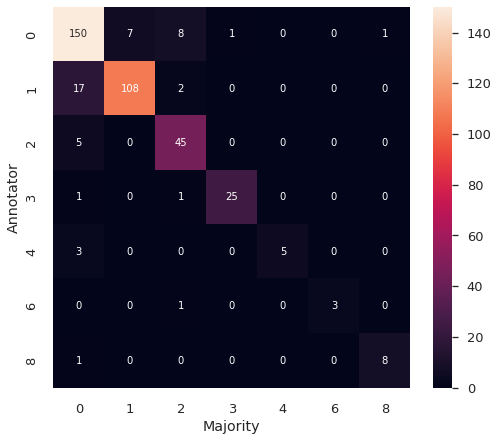

Cohen's kappa for  --> Causal Slippery Slope 	 0.0
Accuracy for  --> Causal Slippery Slope 	 0.99 

Cohen's kappa for  --> Danger Appeal 	 0.4
Accuracy for  --> Danger Appeal 	 0.98 

Cohen's kappa for  --> Default Inference 	 0.75
Accuracy for  --> Default Inference 	 0.88 

Cohen's kappa for  --> Fear Appeal 	 0.54
Accuracy for  --> Fear Appeal 	 0.96 

Cohen's kappa for  --> Need For Help 	 0.45
Accuracy for  --> Need For Help 	 0.98 

Cohen's kappa for  --> Negative Consequences 	 0.77
Accuracy for  --> Negative Consequences 	 0.95 

Cohen's kappa for  --> Positive Consequences 	 0.79
Accuracy for  --> Positive Consequences 	 0.91 

Cohen's kappa for  --> Waste 	 nan
Accuracy for  --> Waste 	 1.0 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = all_agg.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n")

plt.figure(figsize=(8,7))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(a0, a1), annot=True, fmt='g', ax=ax)
ax.xaxis.set_ticklabels(list(str(x) for x in set(a0))); ax.yaxis.set_ticklabels(list(str(x) for x in set(a0)))
plt.ylabel("Annotator")
plt.xlabel("Majority")
plt.show()

for scheme in scheme_cols:  
  a0 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a1 = all_agg.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a0, a1)
  print(f"Cohen's kappa for  --> {scheme} \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} \t {round(accuracy_score(a0, a1), 2)} \n")  

In [ ]:
a11.scheme_label.unique()

array([0, 1, 8, 2, 3, 7])

Cohen's kappa  	 0.54
Accuracy 0.68 




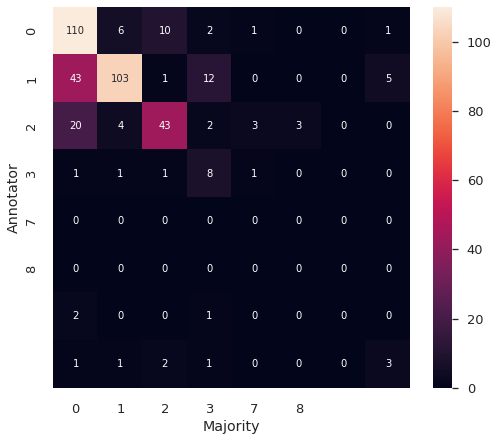

Cohen's kappa for  --> Causal Slippery Slope 	 nan
Accuracy for  --> Causal Slippery Slope 	 1.0 

Cohen's kappa for  --> Danger Appeal 	 0.0
Accuracy for  --> Danger Appeal 	 0.99 

Cohen's kappa for  --> Default Inference 	 0.56
Accuracy for  --> Default Inference 	 0.79 

Cohen's kappa for  --> Fear Appeal 	 0.66
Accuracy for  --> Fear Appeal 	 0.98 

Cohen's kappa for  --> Need For Help 	 0.49
Accuracy for  --> Need For Help 	 0.98 

Cohen's kappa for  --> Negative Consequences 	 0.61
Accuracy for  --> Negative Consequences 	 0.89 

Cohen's kappa for  --> Positive Consequences 	 0.64
Accuracy for  --> Positive Consequences 	 0.83 

Cohen's kappa for  --> Waste 	 0.0
Accuracy for  --> Waste 	 0.99 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [ ]:
a0 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = all_agg.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

plt.figure(figsize=(8,7))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(a0, a1), annot=True, fmt='g', ax=ax)
ax.xaxis.set_ticklabels(list(str(x) for x in set(a0))); ax.yaxis.set_ticklabels(list(str(x) for x in set(a0)))
plt.ylabel("Annotator")
plt.xlabel("Majority")
plt.show()

for scheme in scheme_cols:  
  a0 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a1 = all_agg.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a0, a1)
  print(f"Cohen's kappa for  --> {scheme} \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} \t {round(accuracy_score(a0, a1), 2)} \n")  

In [ ]:
a22.scheme_label.unique()

array([0, 7, 4, 1, 3, 2, 8, 6])

In [ ]:
a22.shape, all_agg.shape

((392, 18), (392, 14))

Cohen's kappa  	 0.47
Accuracy 0.66 




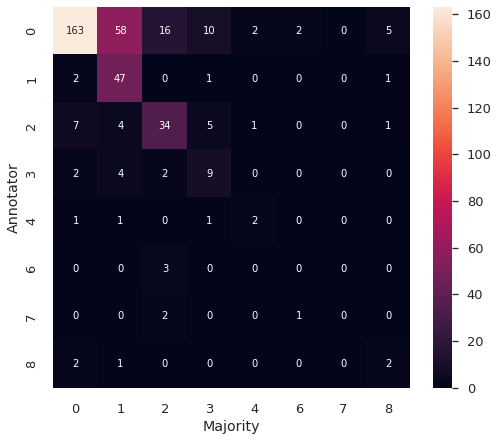

Cohen's kappa for  --> Causal Slippery Slope 	 0.0
Accuracy for  --> Causal Slippery Slope 	 0.99 

Cohen's kappa for  --> Danger Appeal 	 0.57
Accuracy for  --> Danger Appeal 	 0.99 

Cohen's kappa for  --> Default Inference 	 0.5
Accuracy for  --> Default Inference 	 0.74 

Cohen's kappa for  --> Fear Appeal 	 0.61
Accuracy for  --> Fear Appeal 	 0.97 

Cohen's kappa for  --> Need For Help 	 0.44
Accuracy for  --> Need For Help 	 0.99 

Cohen's kappa for  --> Negative Consequences 	 0.59
Accuracy for  --> Negative Consequences 	 0.91 

Cohen's kappa for  --> Positive Consequences 	 0.51
Accuracy for  --> Positive Consequences 	 0.84 

Cohen's kappa for  --> Waste 	 0.0
Accuracy for  --> Waste 	 0.99 



In [ ]:
a0 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = all_agg.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

plt.figure(figsize=(8,7))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(a0, a1), annot=True, fmt='g', ax=ax)
ax.xaxis.set_ticklabels(list(str(x) for x in set(a0))); ax.yaxis.set_ticklabels(list(str(x) for x in set(a0)))
plt.ylabel("Annotator")
plt.xlabel("Majority")
plt.show()

for scheme in scheme_cols:  
  a0 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a1 = all_agg.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a0, a1)
  print(f"Cohen's kappa for  --> {scheme} \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} \t {round(accuracy_score(a0, a1), 2)} \n")  

#Plots - 1 st annotation

In [ ]:
scheme_cols

['Causal Slippery Slope',
 'Danger Appeal',
 'Default Inference',
 'Fear Appeal',
 'Need For Help',
 'Negative Consequences',
 'Positive Consequences',
 'Waste']

In [ ]:
name = ['All Schemes'] * 5 + [scheme_cols[0]] * 5 + [scheme_cols[1]] * 5 + [scheme_cols[2]] * 5 \
+ [scheme_cols[3]] * 5 + [scheme_cols[4]] * 5 + [scheme_cols[5]] * 5 + [scheme_cols[6]] * 5 + [scheme_cols[7]] * 5
name = name * 2

metric = ["Cohen's kappa"] * 45 + ["Accuracy"] * 45

values = [0.7, 0.5, 0.5, 0.7, 0.6, 
          np.nan, np.nan, 0, np.nan, np.nan, 
          0, 0, 0, 0, 0, 
          0.6, 0.6, 0.5, 0.6, 0.6, 
          0.4, 0, 0.1, 0.5, 0.2, 
          0.5, 0.3, 1, 0.8, 0.5, 
          0.7, 0.5, 0.6, 0.7, 0.8, 
          0.7, 0.5, 0.6, 0.7, 0.7, 
          np.nan, 0, 0, 0, 0, 
          0.8, 0.7, 0.6, 0.8, 0.8, 
          1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 
          0.8, 0.8, 0.8, 0.8, 0.8, 
          1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 
          0.9, 0.8, 0.8, 0.9, 0.9, 
          0.9, 0.9, 0.8, 0.9, 0.9, 
          1, 1, 1, 1, 1]

In [ ]:
plot_df = pd.DataFrame({"scheme":name, "metric":metric, "score":values})
plot_df.fillna(0, inplace=True)
plot_df.shape

(90, 3)

In [ ]:
plot_df.head(7)

,scheme,metric,score
0,All Schemes,Cohen's kappa,0.7
1,All Schemes,Cohen's kappa,0.5
2,All Schemes,Cohen's kappa,0.5
3,All Schemes,Cohen's kappa,0.7
4,All Schemes,Cohen's kappa,0.6
5,Causal Slippery Slope,Cohen's kappa,0.0
6,Causal Slippery Slope,Cohen's kappa,0.0


In [ ]:
plot_df_k = plot_df[plot_df.metric == "Cohen's kappa"]
plot_df_a = plot_df[plot_df.metric == "Accuracy"]

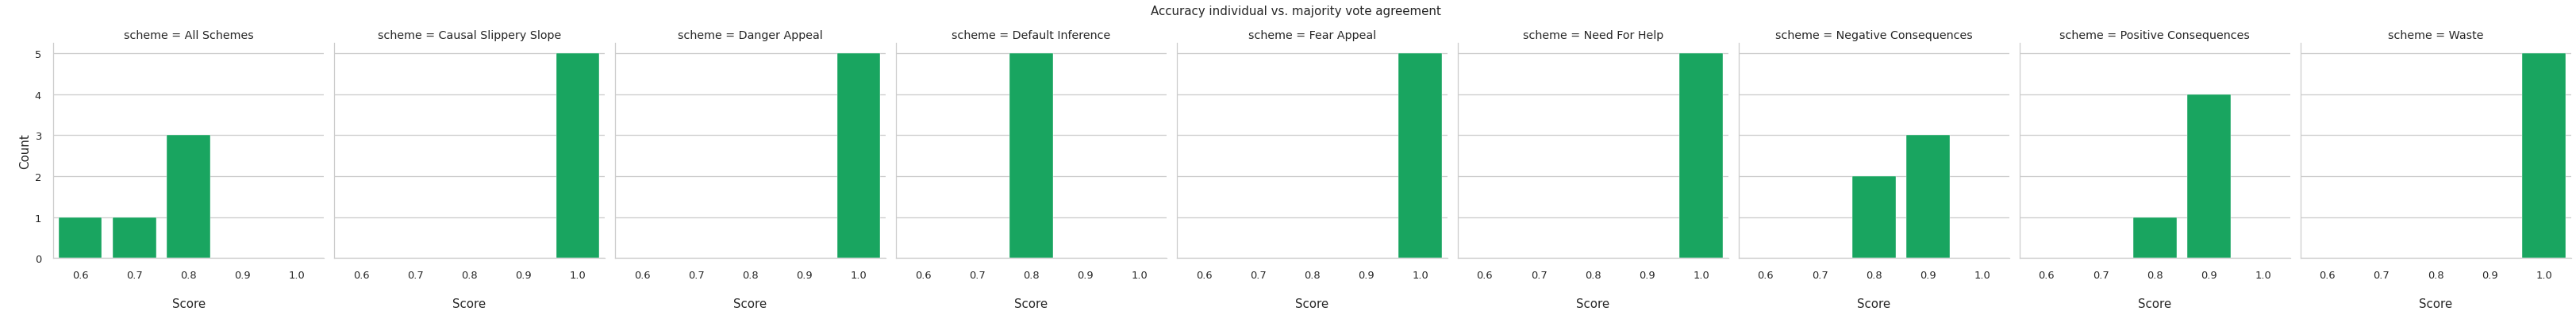

In [ ]:
fig_a = sns.catplot(data = plot_df_a, x = 'score', col = "scheme", color = "#02BC60", 
            facet_kws=dict(margin_titles=True), kind='count')

plt.suptitle('Accuracy individual vs. majority vote agreement\n\n', y=1.05, fontsize=15)
fig_a.set_ylabels("\nCount", fontsize=15)
fig_a.set_xlabels("\nScore", fontsize=15)
plt.show()

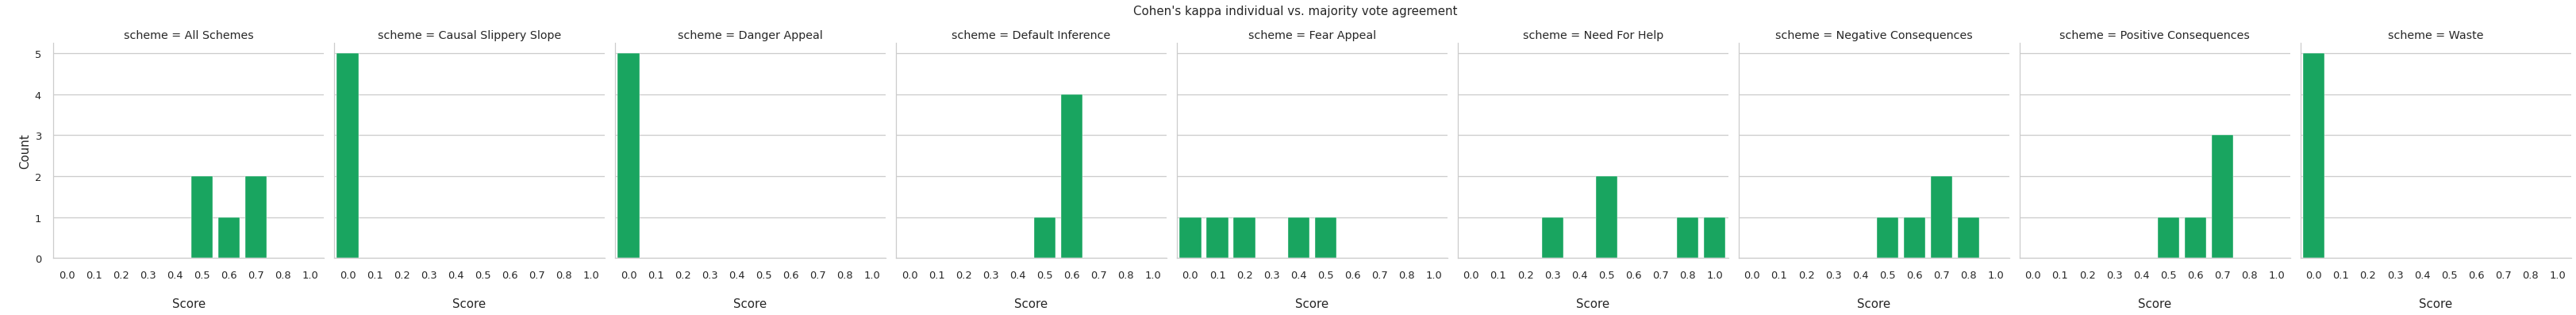

In [ ]:
fig_k = sns.catplot(data = plot_df_k, x = 'score', col = "scheme", color = "#02BC60", 
            facet_kws=dict(margin_titles=True), kind='count')
plt.suptitle("Cohen's kappa individual vs. majority vote agreement\n\n", y=1.05, fontsize=15)
fig_k.set_ylabels("\nCount", fontsize=15)
fig_k.set_xlabels("\nScore", fontsize=15)
plt.show()

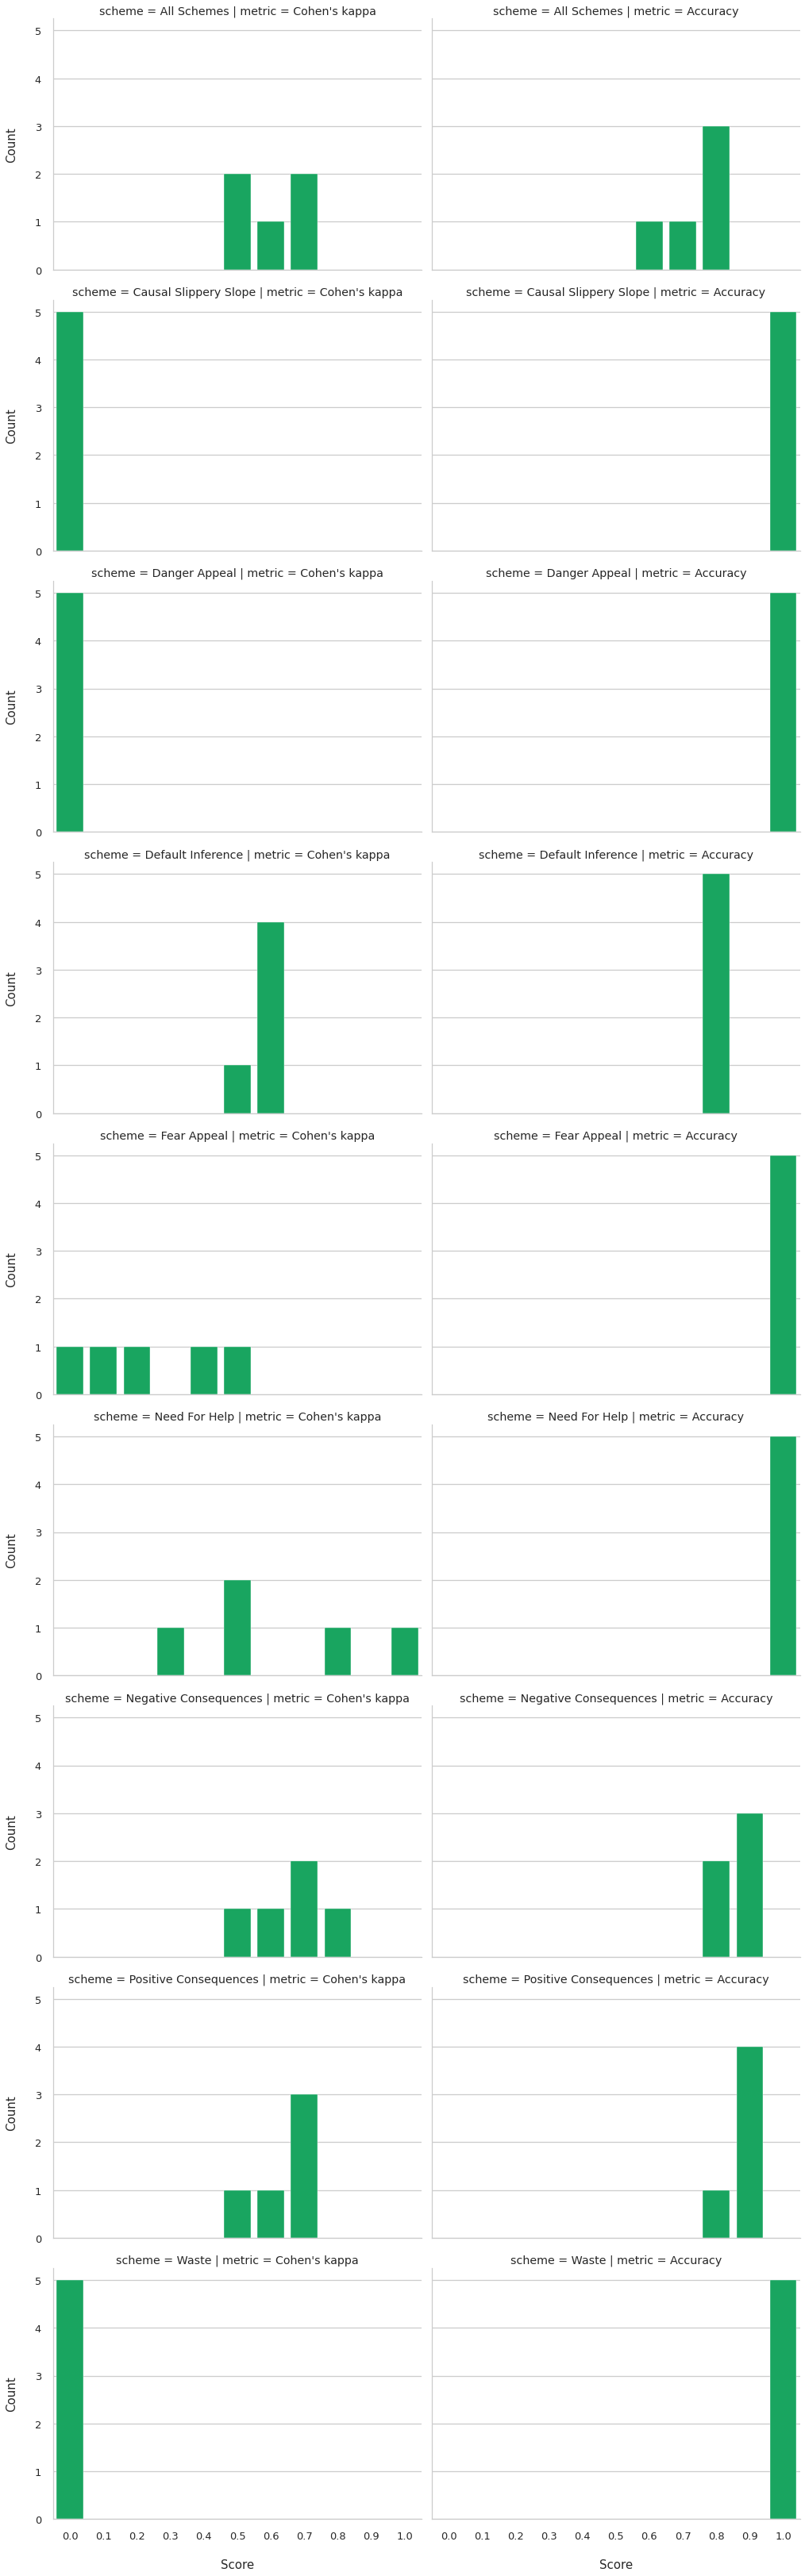

In [ ]:
sns.set_theme(style="whitegrid")
plt.style.use("seaborn-talk")

fig1 = sns.catplot(data = plot_df, x = "score",  row = 'scheme', 
                   color = "#02BC60", col="metric", aspect=1.4, 
                   kind = "count", dodge=True)
fig1.set_ylabels("Count\n", fontsize=15)
fig1.set_xlabels("\nScore", fontsize=15)
plt.show()

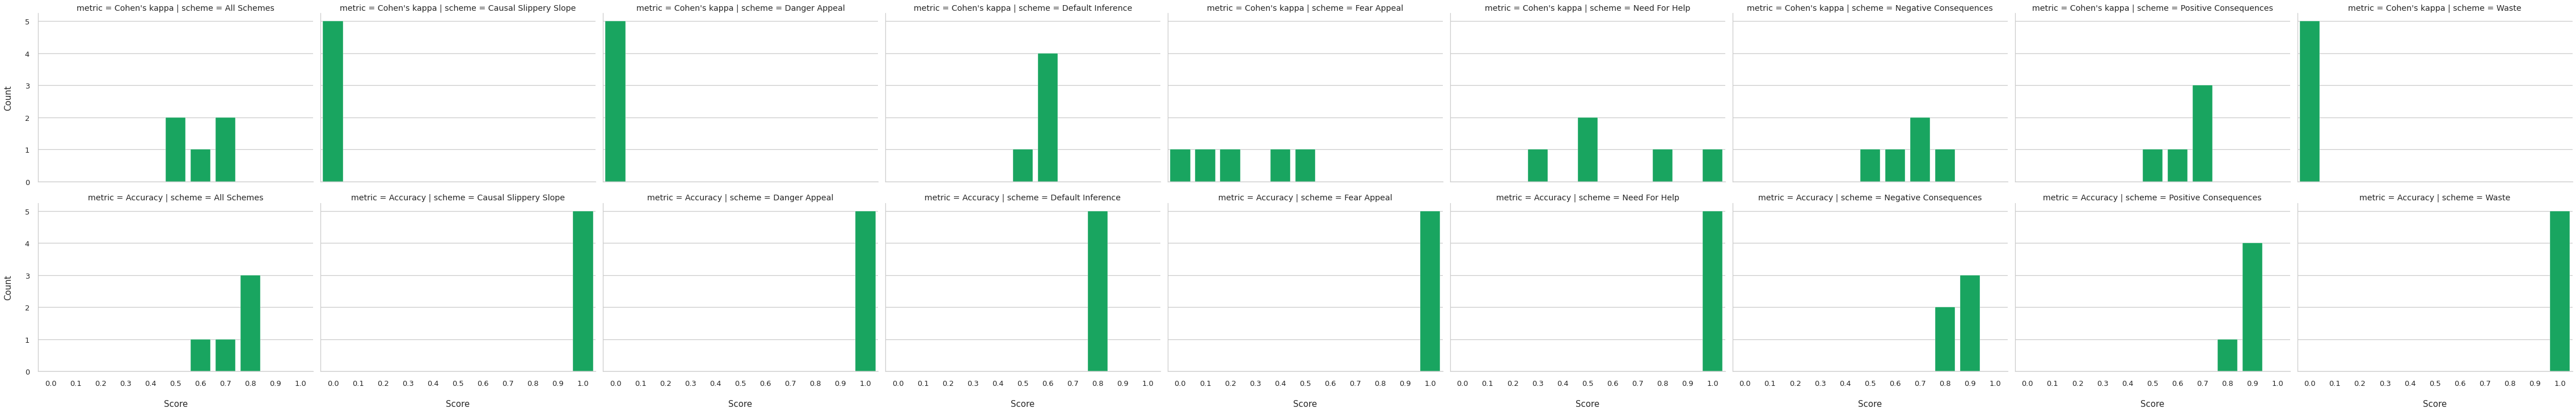

In [ ]:
sns.set_theme(style="whitegrid")
plt.style.use("seaborn-talk")

fig1 = sns.catplot(data = plot_df, x = "score",  col = 'scheme', 
                   color = "#02BC60", row="metric", aspect=1.4, 
                   kind = "count", dodge=True)
fig1.set_ylabels("Count\n", fontsize=15)
fig1.set_xlabels("\nScore", fontsize=15)
plt.show()

#Error analysis

In [ ]:
scheme_cols

['Causal Slippery Slope',
 'Danger Appeal',
 'Default Inference',
 'Fear Appeal',
 'Need For Help',
 'Negative Consequences',
 'Positive Consequences',
 'Waste']

In [ ]:
all_agg = load_data("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/majority_all_agg_actual_kappa_maps.xlsx")
print(all_agg.shape)
all_agg.tail(2)

In [ ]:
all_agg[scheme_cols].sum(numeric_only=True)

Causal Slippery Slope      0
Danger Appeal              0
Default Inference        221
Fear Appeal                3
Need For Help              9
Negative Consequences    115
Positive Consequences    122
Waste                      0
dtype: int64

In [ ]:
2645 / 5

529.0

In [ ]:
maps = load_data('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/all_annot_actual_kappa_maps.xlsx')
print(maps.shape)
maps.sort_values(by = ['conclusion', 'premise', 'annotator_id'], inplace = True)
maps.reset_index(inplace=True, drop=True)

(2645, 18)


In [ ]:
maps_ag = maps.groupby(['conclusion', 'premise', 'annotator_id'], as_index=False).agg(lambda x:x.value_counts().index[0])
maps_ag.shape

(2645, 18)

In [ ]:
maps.head(2)

In [ ]:
maps_ag.head(2)

In [ ]:
perfect_agree = pd.DataFrame(columns = maps_ag.columns)
print(perfect_agree)
low = 0
up = 5
for i in range(529):
  if (maps_ag.iloc[low]["scheme_label"]  == maps_ag.iloc[low+1]["scheme_label"]  == maps_ag.iloc[low+2]["scheme_label"] == maps_ag.iloc[low+3]["scheme_label"] == maps_ag.iloc[low+4]["scheme_label"]):
    perfect_agree = pd.concat([perfect_agree, maps_ag.iloc[low:up]], axis = 0)
  low += 5
  up += 5

perfect_agree.shape  

Empty DataFrame
Columns: [conclusion, premise, annotator_id, map_ID, scheme_name, scheme_aifdb_ID, scheme_label, Causal Slippery Slope, Danger Appeal, Default Inference, Fear Appeal, Need For Help, Negative Consequences, Positive Consequences, Waste, annotator, original_map_ID, Link]
Index: []


(490, 18)

In [ ]:
perfect_agree.drop_duplicates(subset = ["conclusion", "premise", "scheme_label"], inplace=True)
perfect_agree = perfect_agree[['conclusion', 'premise', 'scheme_name','scheme_label','original_map_ID']]
perfect_agree.shape

(98, 5)

In [ ]:
perfect_agree.to_excel("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/perfect_agreement_all_annotators.xlsx")

In [ ]:
perfect_disagree = pd.DataFrame(columns = maps_ag.columns)
print(perfect_disagree)
low = 0
up = 5
for i in range(529):
  if maps_ag.iloc[low:up]["scheme_label"].nunique() > 3:
    perfect_disagree = pd.concat([perfect_disagree, maps_ag.iloc[low:up]], axis = 0)
  low += 5
  up += 5

perfect_disagree.shape  # no example where all 5 annotators disagree, so example for 4 of 5 annot disagree

Empty DataFrame
Columns: [conclusion, premise, annotator_id, map_ID, scheme_name, scheme_aifdb_ID, scheme_label, Causal Slippery Slope, Danger Appeal, Default Inference, Fear Appeal, Need For Help, Negative Consequences, Positive Consequences, Waste, annotator, original_map_ID, Link]
Index: []


(80, 18)

In [ ]:
perfect_disagree.drop_duplicates(subset = ["conclusion", "premise"]).shape # uniq arguments

(16, 18)

In [ ]:
perfect_disagree = perfect_disagree[['conclusion', 'premise', 
                                     'annotator_id', 'annotator', 
                                     'map_ID', 'scheme_name',
                                     'scheme_label','original_map_ID']]
perfect_disagree.shape

(80, 8)

In [ ]:
perfect_disagree

In [ ]:
perfect_disagree.to_excel("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/disagreement_4_annotators.xlsx")

In [ ]:
all_agg.sort_values(by = ['conclusion', 'premise'], inplace=True)
all_agg.reset_index(inplace = True, drop=True)
all_agg.head(2)

In [ ]:
a0 = maps[maps.annotator_id == 3] # 0 and 3
a0.shape

(529, 18)

In [ ]:
a0.sort_values(by = ['conclusion', 'premise'], inplace=True)
a0.reset_index(inplace = True, drop=True)
a0.head(2)

In [ ]:
a0 = a0[['conclusion', 'premise', 'scheme_name', 
                   'scheme_label', 'original_map_ID']]

In [ ]:
all_agg = all_agg[['conclusion', 'premise', 'scheme_name', 
                   'scheme_label', 'original_map_ID']]
a0.shape, all_agg.shape

((529, 5), (529, 5))

In [ ]:
ids = []

for i in a0.index:
  if a0.iloc[i]["scheme_label"] != all_agg.iloc[i]["scheme_label"]:
    ids.append(i)
len(ids)

122

In [ ]:
a00 = a0.loc[ids]
a00['type'] = 'annotator 3'

In [ ]:
maj = all_agg.loc[ids]
maj['type'] = 'majority'

df = pd.concat([df, a00, maj], axis = 0)
df.sort_values(by = ['conclusion', 'premise'], inplace=True)
df.shape

(484, 6)

In [ ]:
df.drop_duplicates(subset = ["conclusion", "premise", "type"], inplace=True)
df.shape

(460, 6)

In [ ]:
df['type'].value_counts()

majority       218
annotator 3    122
annotator 0    120
Name: type, dtype: int64

In [ ]:
df.to_excel("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/majority_best_annotators_disagree.xlsx")

In [ ]:
maps.scheme_name.value_counts()

Default Inference        1134
Positive Consequences     665
Negative Consequences     635
Fear Appeal                81
Need For Help              77
Danger Appeal              36
Waste                      14
Causal Slippery Slope       3
Name: scheme_name, dtype: int64

In [ ]:
df_compare= pd.DataFrame(columns = maps.columns)

low = 0
up = 5

for i in range(529):
  if maps.iloc[low:up]["scheme_label"].nunique() >= 2:
    df_compare= pd.concat([df_compare, maps.iloc[low:up]], axis = 0)
  low += 5
  up += 5

df_compare.shape  

(2155, 18)

In [ ]:
df_compare.head(3)

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,Need For Help,Negative Consequences,Positive Consequences,Waste,annotator,original_map_ID,Link
5,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,24589,Default Inference,72,0,0,0,0,1,0,0,0,0,0,Kalina Piskorska,10458,http://www.aifdb.org/argview/24589
6,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,24838,Default Inference,72,1,0,0,0,1,0,0,0,0,0,Paulina Żelewska,10458,http://www.aifdb.org/argview/24838
7,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,24852,Default Inference,72,2,0,0,0,1,0,0,0,0,0,Anna Kałdonek,10458,http://www.aifdb.org/argview/24852


In [ ]:
2155/5

431.0

In [ ]:
a00 = df_compare[df_compare.annotator_id == 0]
a00.sort_values(by = ['conclusion', 'premise'], inplace = True)
a00.reset_index(inplace=True, drop=True)

a11 = df_compare[df_compare.annotator_id == 1]
a11.sort_values(by = ['conclusion', 'premise'], inplace = True)
a11.reset_index(inplace=True, drop=True)

a22 = df_compare[df_compare.annotator_id == 2]
a22.sort_values(by = ['conclusion', 'premise'], inplace = True)
a22.reset_index(inplace=True, drop=True)

a33 = df_compare[df_compare.annotator_id == 3]
a33.sort_values(by = ['conclusion', 'premise'], inplace = True)
a33.reset_index(inplace=True, drop=True)

a44 = df_compare[df_compare.annotator_id == 4]
a44.sort_values(by = ['conclusion', 'premise'], inplace = True)
a44.reset_index(inplace=True, drop=True)

a00.shape, a11.shape, a22.shape, a33.shape, a44.shape, 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


((431, 18), (431, 18), (431, 18), (431, 18), (431, 18))

In [ ]:
rater_df2 = pd.concat([a00[['conclusion', 'premise', 'annotator_id', 'scheme_label', 'scheme_name']], 
                      a11[['conclusion', 'premise', 'annotator_id', 'scheme_label', 'scheme_name']], 
                      a22[['conclusion', 'premise', 'annotator_id', 'scheme_label', 'scheme_name']],
                      a33[['conclusion', 'premise', 'annotator_id', 'scheme_label', 'scheme_name']],
                      a44[['conclusion', 'premise', 'annotator_id', 'scheme_label', 'scheme_name']]], axis = 0)
rater_df2.reset_index(inplace=True)

In [ ]:
rater_df2['index'].nunique()

431

In [ ]:
rater_df2.columns  = ['item', 'conclusion', 'premise', 'rater', 'rating', 'rating_name']
rater_df2.head(2)

,item,conclusion,premise,rater,rating,rating_name
0,0,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,0,0,Default Inference
1,1,"jesteśmy w stałym zagrożeniu, że Polska może stracić swoją tożsamość","Po co nam Polska, przecież są Niemcy",0,2,Negative Consequences


In [ ]:
rater_df2.item.nunique()

431

In [ ]:
rater_df2.iloc[::431]

,item,conclusion,premise,rater,rating,rating_name
0,0,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,0,0,Default Inference
431,0,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,1,0,Default Inference
862,0,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,2,0,Default Inference
1293,0,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,3,1,Positive Consequences
1724,0,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,4,1,Positive Consequences


###Plot arg ids disagree

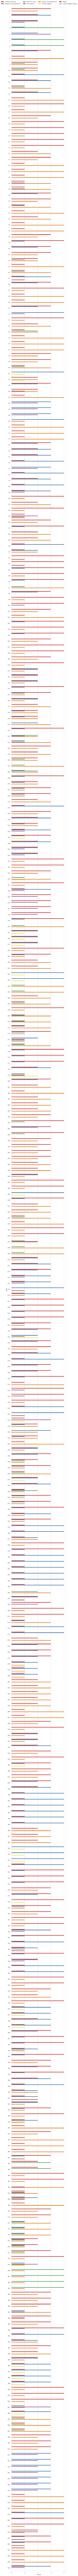

In [ ]:
plt.figure(figsize = (10, 480))
sns.set_theme(style="whitegrid")
plt.style.use("seaborn-talk")

ax = sns.countplot(y="item", hue="rating_name", data=rater_df2, dodge=True, palette='Set1')
ax.set_title(" \n\n", fontsize = 15)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.003), ncol=4)
plt.xticks(np.arange(0, 5, 1))
plt.show()

#Alternative IAA scores

##From R language irrCAC package - multi-category multi-rater scores

In [ ]:
''' normal coeffitients and in () including only 3 best annotators

Gwet's AC1	              coeff: 0.49 (0.56)      pa: 0.541 (0.606)        pe: 0.099 (0.113)

Fleiss' Kappa		          coeff: 0.34 (0.416)      pa: 0.541	        pe:0.307 (0.324)

Krippendorff's Alpha	  	coeff: 0.34       pa: 0.541         pe: 0.307

Brennan-Prediger	 	    	coeff: 0.48 (0.540)       pa: 0.541         pe: 0.125 (0.145)

Percent agreement			    coeff: 0.54  (0.61)  

'''

In [ ]:
!pip install pycm
from pycm import *

In [ ]:
a00 = maps[maps.annotator_id == 0]
a00.sort_values(by = ['conclusion', 'premise'], inplace = True)
a00.reset_index(inplace=True, drop=True)

a11 = maps[maps.annotator_id == 1]
a11.sort_values(by = ['conclusion', 'premise'], inplace = True)
a11.reset_index(inplace=True, drop=True)

a22 = maps[maps.annotator_id == 2]
a22.sort_values(by = ['conclusion', 'premise'], inplace = True)
a22.reset_index(inplace=True, drop=True)

a33 = maps[maps.annotator_id == 3]
a33.sort_values(by = ['conclusion', 'premise'], inplace = True)
a33.reset_index(inplace=True, drop=True)

a44 = maps[maps.annotator_id == 4]
a44.sort_values(by = ['conclusion', 'premise'], inplace = True)
a44.reset_index(inplace=True, drop=True)

a00.shape, a11.shape, a22.shape, a33.shape, a44.shape, 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


((529, 18), (529, 18), (529, 18), (529, 18), (529, 18))

In [ ]:
rater_df = pd.concat([a00[['annotator_id', 'scheme_label']], 
                      a11[['annotator_id', 'scheme_label']], 
                      a22[['annotator_id', 'scheme_label']],
                      a33[['annotator_id', 'scheme_label']],
                      a44[['annotator_id', 'scheme_label']]], axis = 0)
rater_df.reset_index(inplace=True)

In [ ]:
rater_df.iloc[-10:]

,index,annotator_id,scheme_label
2635,519,4,0
2636,520,4,1
2637,521,4,1
2638,522,4,0
2639,523,4,0
2640,524,4,0
2641,525,4,1
2642,526,4,1
2643,527,4,1
2644,528,4,0


In [ ]:
rater_df.columns = ['item', 'rater', 'rating']
rater_df['item'] = rater_df['item'] + 1
rater_df['rater'] = rater_df['rater'] + 1
rater_df['rating'] = rater_df['rating'] + 1
rater_df

,item,rater,rating
0,1,1,2
1,2,1,1
2,3,1,3
3,4,1,1
4,5,1,1
...,...,...,...
2640,525,5,1
2641,526,5,2
2642,527,5,2
2643,528,5,2


In [ ]:
#rater_df.to_excel("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/rater_df.xlsx")

##Summary plots

In [ ]:
maps = load_data('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_all_2iter.xlsx')
print(maps.shape)
maps.sort_values(by = ['conclusion', 'premise', 'annotator_id'], inplace = True)
maps.reset_index(inplace=True, drop=True)

(3774, 18)


In [ ]:
(maps["scheme_name"].value_counts(normalize=True).round(3)*100)

Default Inference        44.8
Positive Consequences    23.5
Negative Consequences    21.8
Need For Help             3.8
Fear Appeal               2.9
Danger Appeal             2.3
Waste                     0.5
Causal Slippery Slope     0.4
Name: scheme_name, dtype: float64

In [ ]:
(maps["scheme_name"].value_counts(normalize=True).round(3)*100).values

array([44.8, 23.5, 21.8,  3.8,  2.9,  2.3,  0.5,  0.4])

In [ ]:
(maps["scheme_name"].value_counts(normalize=True).round(3)*100).index.tolist()

['Default Inference',
 'Positive Consequences',
 'Negative Consequences',
 'Need For Help',
 'Fear Appeal',
 'Danger Appeal',
 'Waste',
 'Causal Slippery Slope']

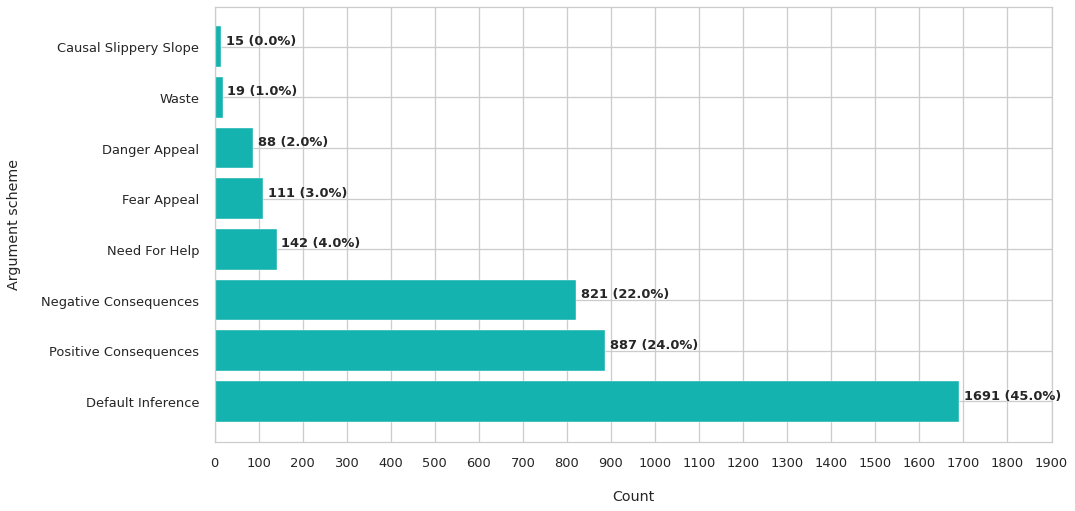

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

n = maps["scheme_name"].value_counts().index.tolist()
s = maps["scheme_name"].value_counts().values
bars = ax.barh(n, s, color = "#15B3AF")


#maps.scheme_name.hist(color = "#15B3AF", bins=8)
#plt.xticks(rotation = 50)
plt.xticks(np.arange(0, 1901, 100))

y = s

yy =(maps["scheme_name"].value_counts(normalize=True).round(2)*100).values
for i, v in enumerate(y):
    ax.text(v + 10, i + .05, str(v) + f" ({str(yy[i])}%)", fontweight='bold', fontsize=13)

plt.xlabel("\nCount")
plt.ylabel("Argument scheme\n")
plt.show()



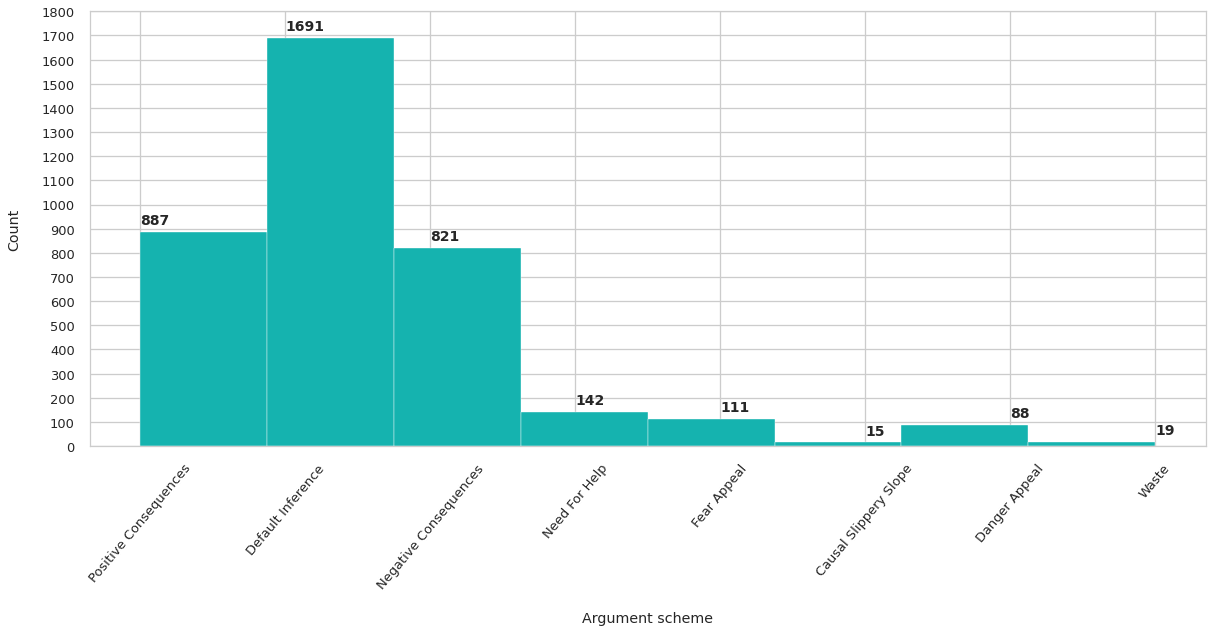

In [ ]:
plt.figure(figsize=(20, 8))
maps.scheme_name.hist(color = "#15B3AF", bins=8)
plt.xticks(rotation = 50)
plt.yticks(np.arange(0, 1801, 100))

n = (maps["scheme_name"].value_counts(normalize=True).round(3)*100).index.tolist()
s = maps["scheme_name"].value_counts().values
for i in range(len(s)):
    plt.annotate(str(s[i]), xy=(n[i],s[i]+20), ha='left', va='bottom', weight='bold', size=14)

plt.ylabel("Count\n")
plt.xlabel("\nArgument scheme")
plt.show()

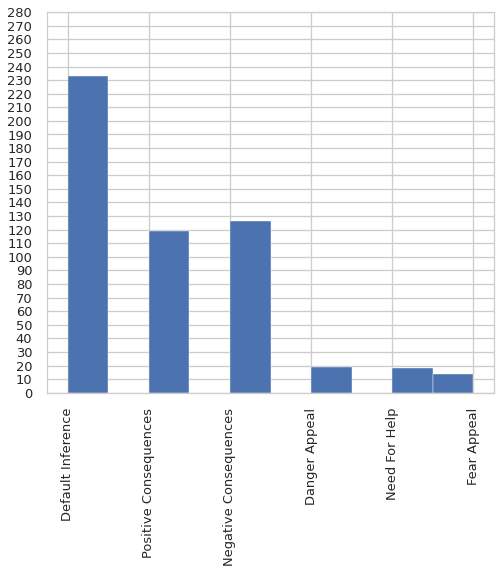

In [ ]:
plt.figure(figsize=(8, 7))
a00.scheme_name.hist()
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 281, 10))
plt.show()

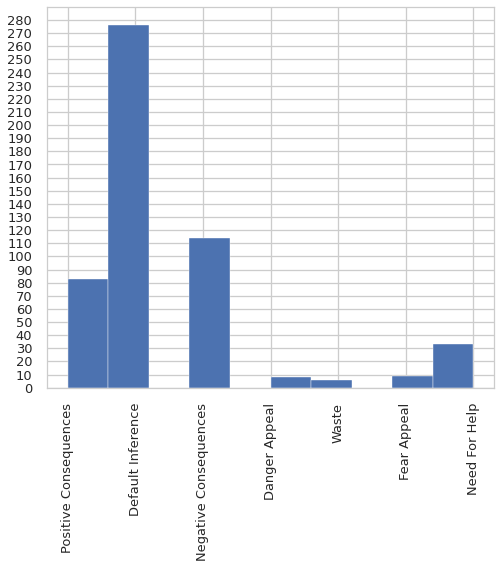

In [ ]:
plt.figure(figsize=(8, 7))
a11.scheme_name.hist()
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 281, 10))
plt.show()

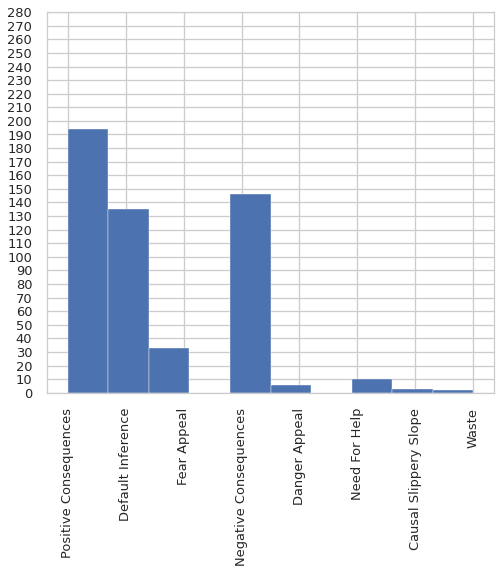

In [ ]:
plt.figure(figsize=(8, 7))
a22.scheme_name.hist()
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 281, 10))
plt.show()

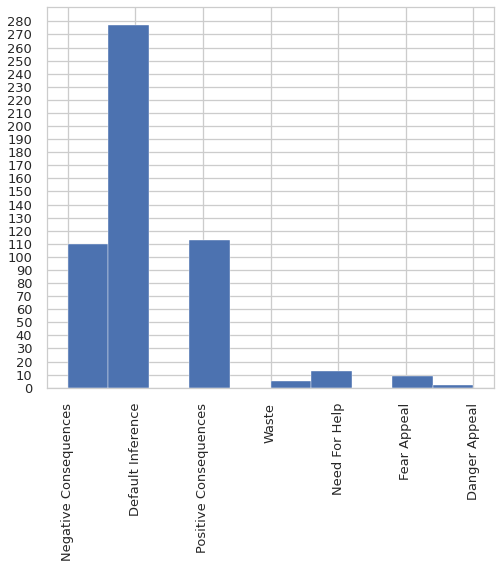

In [ ]:
plt.figure(figsize=(8, 7))
a33.scheme_name.hist()
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 281, 10))
plt.show()

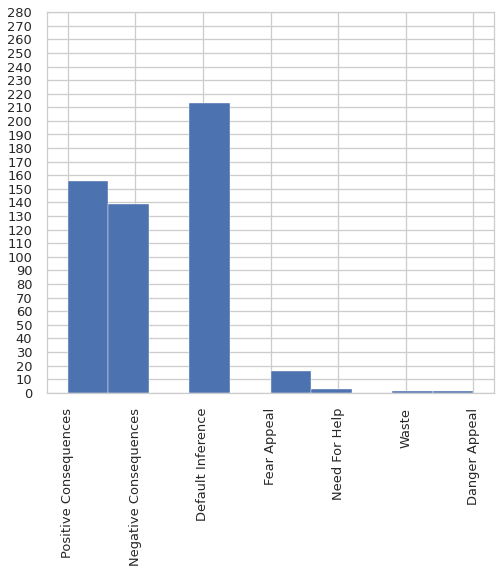

In [ ]:
plt.figure(figsize=(8, 7))
a44.scheme_name.hist()
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 281, 10))
plt.show()

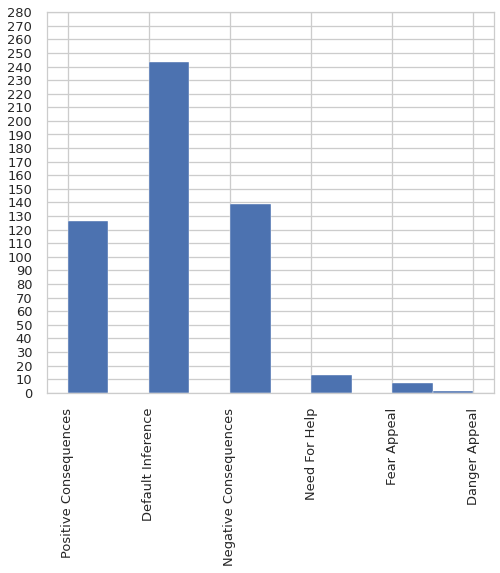

In [ ]:
plt.figure(figsize=(8, 7))
all_agg.scheme_name.hist()
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 281, 10))
plt.show()

In [ ]:
scheme_labels_list = ['Causal Slippery Slope', 'Danger Appeal',
       'Default Inference', 'Fear Appeal', 'Need For Help',
       'Negative Consequences', 'Positive Consequences', 'Waste']


##**Binary labels** 

In [ ]:
def pos_spec_agree(b, c, d):
  try:
    score = (2*d) / ( (2*d) + b + c)
    print(f"Positive specific agreement: {round(score, 3)} ")
  except:
    print("Probably ZeroDivisionError, cannot calculate the score")
  

def neg_spec_agree(a, b, c):
  try:
    score = (2*a) / ( (2*a) + b + c)
    print(f"Negative specific agreement: {round(score, 3)} ")
  except:
    print("Probably ZeroDivisionError, cannot calculate the score")  
  

In [ ]:
neg_spec_agree(a, b, c)

annotator 0 compare

In [ ]:
for scheme in scheme_labels_list:  
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  ['0', '~other~'] 

Overall ACC: 1.0
Kappa: None
Overall RACC: 1.0
SOA1(Landis & Koch): None
SOA2(Fleiss): None
SOA3(Altman): None
SOA4(Cicchetti): None
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: None
ACC Macro: 1.0
F1 Macro: None
TNR Micro: 1.0
FPR Micro: 0.0
TPR Micro: 1.0
FNR Micro: 0.0
PPV Micro: 1.0
F1 Micro: 1.0
Scott PI: None
Gwet AC1: 1.0
Bennett S: 1.0
Kappa Standard Error: None
Kappa 95% CI: ('None', 'None')
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (1.0, 1.0)
Standard Error: 0.0
Response Entropy: -0.0
Reference Entropy: -0.0
Cross Entropy: -0.0
Joint Entropy: -0.0
Conditional Entropy: -0.0
KL Divergence: None
Lambda B: None
Lambda A: None
Kappa Unbiased: None
Overall RACCU: 1.0
Kappa No Prevalence: 1.0
Mutual Information: 0.0
Overall J: None
Hamming Loss: 0.0
Zero-one Loss: 0
NIR: 1.0
P-Value: 1.0
Overall CEN: None
Overall MCEN: None
Overa

In [ ]:
for scheme in scheme_labels_list:  
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  [0, 1] 

Overall ACC: 0.994328922495274
Kappa: 0.0
Overall RACC: 0.994328922495274
SOA1(Landis & Koch): Slight
SOA2(Fleiss): Poor
SOA3(Altman): Poor
SOA4(Cicchetti): Poor
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: 0.5
ACC Macro: 0.994328922495274
F1 Macro: 0.4985781990521327
TNR Micro: 0.994328922495274
FPR Micro: 0.005671077504725952
TPR Micro: 0.994328922495274
FNR Micro: 0.005671077504725952
PPV Micro: 0.994328922495274
F1 Micro: 0.994328922495274
Scott PI: -0.0028436018957190773
Gwet AC1: 0.9942966701825819
Bennett S: 0.9886578449905481
Kappa Standard Error: 0.5757108424939452
Kappa 95% CI: (-1.1283932512881325, 1.1283932512881325)
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (0.9879297169114093, 1.0007281280791387)
Standard Error: 0.0032649008080942385
Response Entropy: 0.05047688778526495
Reference Entropy: -0.0
Cross Entropy: 0.00820492282172347

In [ ]:
for scheme in scheme_labels_list:  
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a33.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  ['0', '~other~'] 

Overall ACC: 1.0
Kappa: None
Overall RACC: 1.0
SOA1(Landis & Koch): None
SOA2(Fleiss): None
SOA3(Altman): None
SOA4(Cicchetti): None
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: None
ACC Macro: 1.0
F1 Macro: None
TNR Micro: 1.0
FPR Micro: 0.0
TPR Micro: 1.0
FNR Micro: 0.0
PPV Micro: 1.0
F1 Micro: 1.0
Scott PI: None
Gwet AC1: 1.0
Bennett S: 1.0
Kappa Standard Error: None
Kappa 95% CI: ('None', 'None')
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (1.0, 1.0)
Standard Error: 0.0
Response Entropy: -0.0
Reference Entropy: -0.0
Cross Entropy: -0.0
Joint Entropy: -0.0
Conditional Entropy: -0.0
KL Divergence: None
Lambda B: None
Lambda A: None
Kappa Unbiased: None
Overall RACCU: 1.0
Kappa No Prevalence: 1.0
Mutual Information: 0.0
Overall J: None
Hamming Loss: 0.0
Zero-one Loss: 0
NIR: 1.0
P-Value: 1.0
Overall CEN: None
Overall MCEN: None
Overa

In [ ]:
for scheme in scheme_labels_list:  
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a44.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  ['0', '~other~'] 

Overall ACC: 1.0
Kappa: None
Overall RACC: 1.0
SOA1(Landis & Koch): None
SOA2(Fleiss): None
SOA3(Altman): None
SOA4(Cicchetti): None
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: None
ACC Macro: 1.0
F1 Macro: None
TNR Micro: 1.0
FPR Micro: 0.0
TPR Micro: 1.0
FNR Micro: 0.0
PPV Micro: 1.0
F1 Micro: 1.0
Scott PI: None
Gwet AC1: 1.0
Bennett S: 1.0
Kappa Standard Error: None
Kappa 95% CI: ('None', 'None')
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (1.0, 1.0)
Standard Error: 0.0
Response Entropy: -0.0
Reference Entropy: -0.0
Cross Entropy: -0.0
Joint Entropy: -0.0
Conditional Entropy: -0.0
KL Divergence: None
Lambda B: None
Lambda A: None
Kappa Unbiased: None
Overall RACCU: 1.0
Kappa No Prevalence: 1.0
Mutual Information: 0.0
Overall J: None
Hamming Loss: 0.0
Zero-one Loss: 0
NIR: 1.0
P-Value: 1.0
Overall CEN: None
Overall MCEN: None
Overa

annotator 1 compare

In [ ]:
for scheme in scheme_labels_list:  
  a1 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  [0, 1] 

Overall ACC: 0.994328922495274
Kappa: 0.0
Overall RACC: 0.994328922495274
SOA1(Landis & Koch): Slight
SOA2(Fleiss): Poor
SOA3(Altman): Poor
SOA4(Cicchetti): Poor
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: 0.5
ACC Macro: 0.994328922495274
F1 Macro: 0.4985781990521327
TNR Micro: 0.994328922495274
FPR Micro: 0.005671077504725952
TPR Micro: 0.994328922495274
FNR Micro: 0.005671077504725952
PPV Micro: 0.994328922495274
F1 Micro: 0.994328922495274
Scott PI: -0.0028436018957190773
Gwet AC1: 0.9942966701825819
Bennett S: 0.9886578449905481
Kappa Standard Error: 0.5757108424939452
Kappa 95% CI: (-1.1283932512881325, 1.1283932512881325)
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (0.9879297169114093, 1.0007281280791387)
Standard Error: 0.0032649008080942385
Response Entropy: 0.05047688778526495
Reference Entropy: -0.0
Cross Entropy: 0.00820492282172347

In [ ]:
for scheme in scheme_labels_list:  
  a1 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a33.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  ['0', '~other~'] 

Overall ACC: 1.0
Kappa: None
Overall RACC: 1.0
SOA1(Landis & Koch): None
SOA2(Fleiss): None
SOA3(Altman): None
SOA4(Cicchetti): None
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: None
ACC Macro: 1.0
F1 Macro: None
TNR Micro: 1.0
FPR Micro: 0.0
TPR Micro: 1.0
FNR Micro: 0.0
PPV Micro: 1.0
F1 Micro: 1.0
Scott PI: None
Gwet AC1: 1.0
Bennett S: 1.0
Kappa Standard Error: None
Kappa 95% CI: ('None', 'None')
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (1.0, 1.0)
Standard Error: 0.0
Response Entropy: -0.0
Reference Entropy: -0.0
Cross Entropy: -0.0
Joint Entropy: -0.0
Conditional Entropy: -0.0
KL Divergence: None
Lambda B: None
Lambda A: None
Kappa Unbiased: None
Overall RACCU: 1.0
Kappa No Prevalence: 1.0
Mutual Information: 0.0
Overall J: None
Hamming Loss: 0.0
Zero-one Loss: 0
NIR: 1.0
P-Value: 1.0
Overall CEN: None
Overall MCEN: None
Overa

In [ ]:
for scheme in scheme_labels_list:  
  a1 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a44.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  ['0', '~other~'] 

Overall ACC: 1.0
Kappa: None
Overall RACC: 1.0
SOA1(Landis & Koch): None
SOA2(Fleiss): None
SOA3(Altman): None
SOA4(Cicchetti): None
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: None
ACC Macro: 1.0
F1 Macro: None
TNR Micro: 1.0
FPR Micro: 0.0
TPR Micro: 1.0
FNR Micro: 0.0
PPV Micro: 1.0
F1 Micro: 1.0
Scott PI: None
Gwet AC1: 1.0
Bennett S: 1.0
Kappa Standard Error: None
Kappa 95% CI: ('None', 'None')
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (1.0, 1.0)
Standard Error: 0.0
Response Entropy: -0.0
Reference Entropy: -0.0
Cross Entropy: -0.0
Joint Entropy: -0.0
Conditional Entropy: -0.0
KL Divergence: None
Lambda B: None
Lambda A: None
Kappa Unbiased: None
Overall RACCU: 1.0
Kappa No Prevalence: 1.0
Mutual Information: 0.0
Overall J: None
Hamming Loss: 0.0
Zero-one Loss: 0
NIR: 1.0
P-Value: 1.0
Overall CEN: None
Overall MCEN: None
Overa

annotator 2 compare

In [ ]:
for scheme in scheme_labels_list:  
  a1 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a33.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  [0, 1] 

Overall ACC: 0.994328922495274
Kappa: 0.0
Overall RACC: 0.994328922495274
SOA1(Landis & Koch): Slight
SOA2(Fleiss): Poor
SOA3(Altman): Poor
SOA4(Cicchetti): Poor
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: 0.5
TPR Macro: 0.5
FPR Macro: 0.5
FNR Macro: 0.5
PPV Macro: None
ACC Macro: 0.994328922495274
F1 Macro: 0.4985781990521327
TNR Micro: 0.994328922495274
FPR Micro: 0.005671077504725952
TPR Micro: 0.994328922495274
FNR Micro: 0.005671077504725952
PPV Micro: 0.994328922495274
F1 Micro: 0.994328922495274
Scott PI: -0.0028436018957190773
Gwet AC1: 0.9942966701825819
Bennett S: 0.9886578449905481
Kappa Standard Error: 0.5757108424939452
Kappa 95% CI: (-1.1283932512881325, 1.1283932512881325)
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (0.9879297169114093, 1.0007281280791387)
Standard Error: 0.0032649008080942385
Response Entropy: -0.0
Reference Entropy: 0.05047688778526495
Cross Entropy: -0.0
Joint Entropy: 0.

In [ ]:
for scheme in scheme_labels_list:  
  a1 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a44.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  [0, 1] 

Overall ACC: 0.994328922495274
Kappa: 0.0
Overall RACC: 0.994328922495274
SOA1(Landis & Koch): Slight
SOA2(Fleiss): Poor
SOA3(Altman): Poor
SOA4(Cicchetti): Poor
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: 0.5
TPR Macro: 0.5
FPR Macro: 0.5
FNR Macro: 0.5
PPV Macro: None
ACC Macro: 0.994328922495274
F1 Macro: 0.4985781990521327
TNR Micro: 0.994328922495274
FPR Micro: 0.005671077504725952
TPR Micro: 0.994328922495274
FNR Micro: 0.005671077504725952
PPV Micro: 0.994328922495274
F1 Micro: 0.994328922495274
Scott PI: -0.0028436018957190773
Gwet AC1: 0.9942966701825819
Bennett S: 0.9886578449905481
Kappa Standard Error: 0.5757108424939452
Kappa 95% CI: (-1.1283932512881325, 1.1283932512881325)
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (0.9879297169114093, 1.0007281280791387)
Standard Error: 0.0032649008080942385
Response Entropy: -0.0
Reference Entropy: 0.05047688778526495
Cross Entropy: -0.0
Joint Entropy: 0.

annotator 3 compare

In [ ]:
for scheme in scheme_labels_list:  
  a1 = a33.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a44.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  ['0', '~other~'] 

Overall ACC: 1.0
Kappa: None
Overall RACC: 1.0
SOA1(Landis & Koch): None
SOA2(Fleiss): None
SOA3(Altman): None
SOA4(Cicchetti): None
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: None
ACC Macro: 1.0
F1 Macro: None
TNR Micro: 1.0
FPR Micro: 0.0
TPR Micro: 1.0
FNR Micro: 0.0
PPV Micro: 1.0
F1 Micro: 1.0
Scott PI: None
Gwet AC1: 1.0
Bennett S: 1.0
Kappa Standard Error: None
Kappa 95% CI: ('None', 'None')
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (1.0, 1.0)
Standard Error: 0.0
Response Entropy: -0.0
Reference Entropy: -0.0
Cross Entropy: -0.0
Joint Entropy: -0.0
Conditional Entropy: -0.0
KL Divergence: None
Lambda B: None
Lambda A: None
Kappa Unbiased: None
Overall RACCU: 1.0
Kappa No Prevalence: 1.0
Mutual Information: 0.0
Overall J: None
Hamming Loss: 0.0
Zero-one Loss: 0
NIR: 1.0
P-Value: 1.0
Overall CEN: None
Overall MCEN: None
Overa

##**Multi-category**

In [ ]:
from sklearn.metrics import matthews_corrcoef, balanced_accuracy_score

annotator 0 compare

In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()


cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

#print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         7         8         
Actual
0         171       45        50        7         1         0         2         

1         28        52        1         1         0         0         1         

2         22        6         58        3         17        0         8         

3         0         0         8         1         0         0         0         

4         1         0         6         0         1         0         0         

7         3         0         3         0         0         0         0         

8         8         16        0         2         0         0         7         


Classes:  [0, 1, 2, 3, 4, 7, 8] 

Overall ACC: 0.5482041587901701
Overall RACCU: 0.3228440435818911
Overall RACC: 0.3195421685885914
Kappa: 0.33604138220775126
Gwet AC1: 0.49072807223658155
Bennett S: 0.47290485192186515
Kappa Standard Error: 0.03179898256705593
Kappa Unbiased: 0.33280385865664713
Scott PI: 0.33280385865664713
Kappa No

In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

#print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict  0        1        2        3        4        6        7        8        
Actual
0        87       23       18       5        1        0        0        1        

1        76       88       13       7        1        0        0        9        

2        56       3        73       0        13       0        0        1        

3        8        3        20       1        1        0        0        0        

4        2        2        1        1        0        0        0        0        

6        0        0        0        0        3        0        0        0        

7        1        0        1        0        0        0        0        0        

8        3        0        0        0        0        0        0        7        


Classes:  [0, 1, 2, 3, 4, 6, 7, 8] 

Overall ACC: 0.4839319470699433
Overall RACCU: 0.2778434896959344
Overall RACC: 0.26333882454679625
Kappa: 0.29944990977356073
Gwet AC1: 0.42456730938901344
Bennett S: 0.41020793950850665
Kappa Standard Error:

In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a33.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

#print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         7         8         
Actual
0         169       53        35        6         10        0         4         

1         39        60        4         4         0         0         6         

2         22        1         79        0         8         0         0         

3         0         1         4         3         1         0         0         

4         0         0         1         1         0         0         0         

7         1         1         3         0         0         0         0         

8         2         3         0         0         0         0         8         


Classes:  [0, 1, 2, 3, 4, 7, 8] 

Overall ACC: 0.6030245746691871
Overall RACCU: 0.3319527874757452
Overall RACC: 0.3296371868310934
Kappa: 0.4078200378474906
Gwet AC1: 0.5532870137973419
Bennett S: 0.5368620037807182
Kappa Standard Error: 0.03173303173438137
Kappa Unbiased: 0.40576741001460304
Scott PI: 0.40576741001460304
Kappa No Pr

In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a44.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

#print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         7         8         
Actual
0         134       36        35        0         4         0         4         

1         62        74        6         5         0         0         9         

2         35        6         81        1         15        0         1         

3         2         3         2         8         0         0         1         

4         0         0         1         0         0         0         0         

7         0         0         1         0         0         0         0         

8         0         0         0         0         0         0         3         


Classes:  [0, 1, 2, 3, 4, 7, 8] 

Overall ACC: 0.5671077504725898
Overall RACCU: 0.3095579275374231
Overall RACC: 0.3073316633373952
Kappa: 0.37503675768816064
Gwet AC1: 0.5108154892343145
Bennett S: 0.4949590422180214
Kappa Standard Error: 0.031100654230912225
Kappa Unbiased: 0.3730216236918649
Scott PI: 0.3730216236918649
Kappa No Pr

annotator 1 compare

In [ ]:
a0 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         6         7         8         
Actual
0         100       7         13        1         3         0         4         7         

1         86        68        20        0         1         0         0         19        

2         69        5         65        1         3         0         2         1         

3         14        2         9         7         1         0         0         0         

4         4         1         1         0         0         0         0         0         

6         0         0         3         0         0         0         0         0         

7         2         0         0         0         0         0         0         0         

8         1         0         3         0         0         0         0         6         


Classes:  [0, 1, 2, 3, 4, 6, 7, 8] 

Overall ACC: 0.46502835538752363
Kappa: 0.2842054430355538
Overall RACC: 0.25261845119192683
SOA1(Landis & Koch): Fair
SOA2(Flei

In [ ]:
a0 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a33.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         7         8         
Actual
0         188       35        38        1         1         5         9         

1         42        44        10        0         0         0         17        

2         43        1         52        8         5         1         0         

3         2         0         6         0         1         0         0         

4         0         0         1         0         1         0         0         

7         1         0         4         0         0         0         0         

8         0         3         3         0         0         0         7         


Classes:  [0, 1, 2, 3, 4, 7, 8] 

Overall ACC: 0.5519848771266541
Kappa: 0.30700222205025607
Overall RACC: 0.35351145829238745
SOA1(Landis & Koch): Fair
SOA2(Fleiss): Poor
SOA3(Altman): Fair
SOA4(Cicchetti): Poor
SOA5(Cramer): Moderate
SOA6(Matthews): Weak
TNR Macro: 0.9023776981539521
TPR Macro: 0.36846710045329895
FPR Macro: 0.097622

In [ ]:
a0 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a44.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         7         8         
Actual
0         149       33        19        1         3         5         3         

1         68        49        11        1         1         0         26        

2         50        1         74        7         4         1         2         

3         8         0         6         0         0         0         2         

4         0         0         1         0         0         0         0         

7         1         0         0         0         0         0         0         

8         0         0         3         0         0         0         0         


Classes:  [0, 1, 2, 3, 4, 7, 8] 

Overall ACC: 0.5141776937618148
Kappa: 0.29191883417881065
Overall RACC: 0.31388895837279024
SOA1(Landis & Koch): Fair
SOA2(Fleiss): Poor
SOA3(Altman): Fair
SOA4(Cicchetti): Poor
SOA5(Cramer): Moderate
SOA6(Matthews): Weak
TNR Macro: 0.8996553849279216
TPR Macro: 0.22085816875055905
FPR Macro: 0.100344

annotator 2 compare

In [ ]:
a0 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a33.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()


cm = ConfusionMatrix(a0, a1)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a0, a1)
score_cba = balanced_accuracy_score(a0, a1)

print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         6         7         8         
Actual
0         104       18        13        0         0         0         0         0         

1         99        83        5         3         1         0         1         2         

2         63        10        71        0         0         0         2         0         

3         7         0         16        5         1         0         2         2         

4         3         1         1         1         0         0         0         0         

6         0         0         3         0         0         0         0         0         

7         1         0         1         0         0         0         0         0         

8         0         1         0         0         0         0         0         9         


Classes:  [0, 1, 2, 3, 4, 6, 7, 8] 

Overall ACC: 0.5141776937618148
Kappa: 0.3336127245545671
Overall RACC: 0.2709610100021083
SOA1(Landis & Koch): Fair
SOA2(Fleiss

In [ ]:
a0 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a44.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a0, a1)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a0, a1)
score_cba = balanced_accuracy_score(a0, a1)

print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         6         7         8         
Actual
0         83        33        15        4         0         0         0         0         

1         63        106       15        9         1         0         0         0         

2         57        9         80        0         0         0         0         0         

3         3         2         26        2         0         0         0         0         

4         2         1         2         1         0         0         0         0         

6         3         0         0         0         0         0         0         0         

7         0         0         1         0         0         0         1         0         

8         2         5         0         0         0         0         0         3         


Classes:  [0, 1, 2, 3, 4, 6, 7, 8] 

Overall ACC: 0.5198487712665406
Kappa: 0.328042328042328
Overall RACC: 0.28544423440453687
SOA1(Landis & Koch): Fair
SOA2(Fleiss

annotator 3 compare

In [ ]:
a0 = a33.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a44.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         7         8         
Actual
0         165       21        23        1         0         0         3         

1         63        86        0         0         0         0         7         

2         41        2         86        6         1         3         0         

3         7         4         0         2         1         2         0         

4         1         0         0         0         0         0         0         

7         0         0         1         0         0         0         0         

8         0         0         0         0         0         0         3         


Classes:  [0, 1, 2, 3, 4, 7, 8] 

Overall ACC: 0.6465028355387523
Kappa: 0.47306266379732803
Overall RACC: 0.32914762311455437
SOA1(Landis & Koch): Moderate
SOA2(Fleiss): Intermediate to Good
SOA3(Altman): Moderate
SOA4(Cicchetti): Fair
SOA5(Cramer): Relatively Strong
SOA6(Matthews): Weak
TNR Macro: 0.923675841851464
TPR Macro: 0.43851